# IMPORT LIBRARY

In [1]:
import numpy as np
import pandas as pd
from itertools import product
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import random
import itertools
from tqdm import tqdm
from scipy.stats import gmean


# DATA LOAD

In [2]:
df = pd.read_csv("../data/for_simulation.csv")

# 1. 최소 리워드를 제공 할 때 순이익이 0을 넘길 수 있는 성장율
- ('High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0)

In [3]:
increase_rate_combinations = []
reward_combinations = [
    {'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}]

for i in np.arange(5, 26, 0.1):
    increase_rate_combinations.append(i * 0.01)

all_combinations = list(product(reward_combinations, increase_rate_combinations))
# 시뮬레이션 결과 저장
simulation_results = []

# 모든 조합에 대해 시뮬레이션 실행

for reward_amounts, increase_rates in all_combinations:
    # Trust level별 초기 총 수익(판매 대금의 10%) 계산
    initial_revenues = {level: int(df[df['trust_level'] == level]['payment_value'].sum() * 0.1) for level in df['trust_level'].unique()}
    initial_trust_distribution = df['trust_level'].value_counts(normalize=True).to_dict()
    
    # 초기 수익 및 시뮬레이션 계산
    initial_total_revenue = sum(initial_revenues.values())
    reward_provided_total = 0
    simulation_total_revenue = 0

    for trust_level, reward in reward_amounts.items():
        # 리워드 제공액 계산
        trust_level_count = len(df[df['trust_level'] == trust_level])
        reward_provided = reward * trust_level_count
        reward_provided_total += reward_provided
        
        # 구매 증가율에 따른 시뮬레이션 수익
        initial_revenue = initial_revenues.get(trust_level, 0)

        simulation_revenue = int(initial_revenue * (1 + increase_rates))
        simulation_total_revenue += simulation_revenue
    
    # 시뮬레이션 순수익
    simulation_net_profit = simulation_total_revenue - reward_provided_total
    
    # 리워드 제공에 따른 추가 수익
    additional_revenue = simulation_net_profit - initial_total_revenue
    
    # 시뮬레이션 결과 저장
    simulation_results.append({
        'Reward Combination': reward_amounts,
        'Increase Rate Combination': round(increase_rates*100,1),
        'Initial Revenue': initial_total_revenue,
        'Simulation Revenue': simulation_total_revenue,
        'Reward Provided': reward_provided_total,
        'Simulation Net Profit': simulation_net_profit,
        'Additional Revenue': additional_revenue
    })




In [4]:
# 결과 DataFrame 생성
minreward_simulation = pd.DataFrame(simulation_results)

# 상위 10개의 시뮬레이션 결과 출력
print("다양한 시뮬레이션 결과:")

minreward_simulation[minreward_simulation['Additional Revenue']>0].sort_values(by=["Additional Revenue"],ascending=True)

다양한 시뮬레이션 결과:


,Reward Combination,Increase Rate Combination,Initial Revenue,Simulation Revenue,Reward Provided,Simulation Net Profit,Additional Revenue
44,"{'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}",9.4,1993048,2180392,186267,1994125,1077
45,"{'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}",9.5,1993048,2182386,186267,1996119,3071
46,"{'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}",9.6,1993048,2184379,186267,1998112,5064
47,"{'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}",9.7,1993048,2186371,186267,2000104,7056
48,"{'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}",9.8,1993048,2188365,186267,2002098,9050
...,...,...,...,...,...,...,...
205,"{'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}",25.5,1993048,2501273,186267,2315006,321958
206,"{'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}",25.6,1993048,2503267,186267,2317000,323952
207,"{'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}",25.7,1993048,2505259,186267,2318992,325944
208,"{'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}",25.8,1993048,2507252,186267,2320985,327937


In [5]:
low_rate = minreward_simulation[minreward_simulation['Additional Revenue']>0].sort_values(by=["Additional Revenue"],ascending=True).reset_index(drop=True).loc[0,'Increase Rate Combination']
low_rate

9.4

9.4%의 상승을 해야 흑자

# 2. 최대 리워드를 제공 할 때 순이익이 0을 넘길 수 있는 성장율
- ('High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0)

In [6]:
increase_rate_combinations = []
reward_combinations = [
    {'High': 9, 'Mid': 6, 'Low': 4, 'Very Low': 0}]

for i in np.arange(5, 31, 0.1):
    increase_rate_combinations.append(i * 0.01)

all_combinations = list(product(reward_combinations, increase_rate_combinations))
# 시뮬레이션 결과 저장
simulation_results = []

# 모든 조합에 대해 시뮬레이션 실행

for reward_amounts, increase_rates in all_combinations:
    # Trust level별 초기 총 수익(판매 대금의 10%) 계산
    initial_revenues = {level: int(df[df['trust_level'] == level]['payment_value'].sum() * 0.1) for level in df['trust_level'].unique()}
    initial_trust_distribution = df['trust_level'].value_counts(normalize=True).to_dict()
    
    # 초기 수익 및 시뮬레이션 계산
    initial_total_revenue = sum(initial_revenues.values())
    reward_provided_total = 0
    simulation_total_revenue = 0

    for trust_level, reward in reward_amounts.items():
        # 리워드 제공액 계산
        trust_level_count = len(df[df['trust_level'] == trust_level])
        reward_provided = reward * trust_level_count
        reward_provided_total += reward_provided
        
        # 구매 증가율에 따른 시뮬레이션 수익
        initial_revenue = initial_revenues.get(trust_level, 0)

        simulation_revenue = int(initial_revenue * (1 + increase_rates))
        simulation_total_revenue += simulation_revenue
    
    # 시뮬레이션 순수익
    simulation_net_profit = simulation_total_revenue - reward_provided_total
    
    # 리워드 제공에 따른 추가 수익
    additional_revenue = simulation_net_profit - initial_total_revenue
    
    # 시뮬레이션 결과 저장
    simulation_results.append({
        'Reward Combination': reward_amounts,
        'Increase Rate Combination': round(increase_rates*100,1),
        'Initial Revenue': initial_total_revenue,
        'Simulation Revenue': simulation_total_revenue,
        'Reward Provided': reward_provided_total,
        'Simulation Net Profit': simulation_net_profit,
        'Additional Revenue': additional_revenue
    })




In [7]:
# 결과 DataFrame 생성
maxreward_simulation = pd.DataFrame(simulation_results)

# 상위 10개의 시뮬레이션 결과 출력
print("다양한 시뮬레이션 결과:")

maxreward_simulation[maxreward_simulation['Additional Revenue']>0].sort_values(by=["Additional Revenue"],ascending=True)

다양한 시뮬레이션 결과:


,Reward Combination,Increase Rate Combination,Initial Revenue,Simulation Revenue,Reward Provided,Simulation Net Profit,Additional Revenue
242,"{'High': 9, 'Mid': 6, 'Low': 4, 'Very Low': 0}",29.2,1993048,2575016,580419,1994597,1549
243,"{'High': 9, 'Mid': 6, 'Low': 4, 'Very Low': 0}",29.3,1993048,2577009,580419,1996590,3542
244,"{'High': 9, 'Mid': 6, 'Low': 4, 'Very Low': 0}",29.4,1993048,2579003,580419,1998584,5536
245,"{'High': 9, 'Mid': 6, 'Low': 4, 'Very Low': 0}",29.5,1993048,2580994,580419,2000575,7527
246,"{'High': 9, 'Mid': 6, 'Low': 4, 'Very Low': 0}",29.6,1993048,2582988,580419,2002569,9521
247,"{'High': 9, 'Mid': 6, 'Low': 4, 'Very Low': 0}",29.7,1993048,2584982,580419,2004563,11515
248,"{'High': 9, 'Mid': 6, 'Low': 4, 'Very Low': 0}",29.8,1993048,2586975,580419,2006556,13508
249,"{'High': 9, 'Mid': 6, 'Low': 4, 'Very Low': 0}",29.9,1993048,2588967,580419,2008548,15500
250,"{'High': 9, 'Mid': 6, 'Low': 4, 'Very Low': 0}",30.0,1993048,2590959,580419,2010540,17492
251,"{'High': 9, 'Mid': 6, 'Low': 4, 'Very Low': 0}",30.1,1993048,2592954,580419,2012535,19487


In [8]:
high_rate = maxreward_simulation[maxreward_simulation['Additional Revenue']>0].sort_values(by=["Additional Revenue"],ascending=True).reset_index(drop=True).loc[0,'Increase Rate Combination']
high_rate

29.2

In [9]:

inbcrease_rate = round(gmean([low_rate, high_rate]),1)
inbcrease_rate

16.6

> Increase_rate = 16.6

# 3. 리워드 추출
- 리워드를 제공하면 Increase rate의 성장을 이룬다고 가정
- 이때, 기존 데이터를 활용하여 |수익| 을 오름차순 정렬하여 리워드 조합 8개 추출

In [10]:
reward_combinations = []

very_low_reward = 0  # 디폴트 0
reward_min = 3
reward_max = 9
for i in range(reward_min, reward_max+1):
    # 랜덤 리워드 금액 설정
    high_reward = i
    for j in range(2,int(round(i*2/3))+1):
        mid_reward = j
        for k in range(1,int(round(j*2/3))+1):
            low_reward = k
            reward_combinations.append({
                'High': high_reward,
                'Mid': mid_reward,
                'Low': low_reward,
                'Very Low': very_low_reward
            })

increase_rate_combinations = [inbcrease_rate * 0.01]

all_combinations = list(product(reward_combinations, increase_rate_combinations))
# 시뮬레이션 결과 저장
simulation_results = []

# 모든 조합에 대해 시뮬레이션 실행

for reward_amounts, increase_rates in all_combinations:
    # Trust level별 초기 총 수익(판매 대금의 10%) 계산
    initial_revenues = {level: int(df[df['trust_level'] == level]['payment_value'].sum() * 0.1) for level in df['trust_level'].unique()}
    initial_trust_distribution = df['trust_level'].value_counts(normalize=True).to_dict()
    
    # 초기 수익 및 시뮬레이션 계산
    initial_total_revenue = sum(initial_revenues.values())
    reward_provided_total = 0
    simulation_total_revenue = 0

    for trust_level, reward in reward_amounts.items():
        # 리워드 제공액 계산
        trust_level_count = len(df[df['trust_level'] == trust_level])
        reward_provided = reward * trust_level_count
        reward_provided_total += reward_provided
        
        # 구매 증가율에 따른 시뮬레이션 수익
        initial_revenue = initial_revenues.get(trust_level, 0)

        simulation_revenue = int(initial_revenue * (1 + increase_rates))
        simulation_total_revenue += simulation_revenue
    
    # 시뮬레이션 순수익
    simulation_net_profit = simulation_total_revenue - reward_provided_total
    
    # 리워드 제공에 따른 추가 수익
    additional_revenue = simulation_net_profit - initial_total_revenue
    
    # 시뮬레이션 결과 저장
    simulation_results.append({
        'Reward Combination': reward_amounts,
        'Increase Rate Combination': round(increase_rates*100,1),
        'Initial Revenue': initial_total_revenue,
        'Simulation Revenue': simulation_total_revenue,
        'Reward Provided': reward_provided_total,
        'Simulation Net Profit': simulation_net_profit,
        'Additional Revenue': additional_revenue
    })




In [11]:
# 결과 DataFrame 생성
reward_combinations_simulation = pd.DataFrame(simulation_results)

# 상위 10개의 시뮬레이션 결과 출력
print("다양한 시뮬레이션 결과:")
reward_combinations_simulation['distance_from_zero'] = abs(reward_combinations_simulation['Additional Revenue'])
reward_combinations_simulation.sort_values(by=["distance_from_zero"],ascending=True)

다양한 시뮬레이션 결과:


,Reward Combination,Increase Rate Combination,Initial Revenue,Simulation Revenue,Reward Provided,Simulation Net Profit,Additional Revenue,distance_from_zero
10,"{'High': 6, 'Mid': 4, 'Low': 1, 'Very Low': 0}",16.6,1993048,2323892,350916,1972976,-20072,20072
16,"{'High': 7, 'Mid': 4, 'Low': 1, 'Very Low': 0}",16.6,1993048,2323892,352661,1971231,-21817,21817
25,"{'High': 8, 'Mid': 4, 'Low': 1, 'Very Low': 0}",16.6,1993048,2323892,354406,1969486,-23562,23562
34,"{'High': 9, 'Mid': 4, 'Low': 1, 'Very Low': 0}",16.6,1993048,2323892,356151,1967741,-25307,25307
33,"{'High': 9, 'Mid': 3, 'Low': 2, 'Very Low': 0}",16.6,1993048,2323892,298062,2025830,32782,32782
24,"{'High': 8, 'Mid': 3, 'Low': 2, 'Very Low': 0}",16.6,1993048,2323892,296317,2027575,34527,34527
15,"{'High': 7, 'Mid': 3, 'Low': 2, 'Very Low': 0}",16.6,1993048,2323892,294572,2029320,36272,36272
9,"{'High': 6, 'Mid': 3, 'Low': 2, 'Very Low': 0}",16.6,1993048,2323892,292827,2031065,38017,38017
6,"{'High': 5, 'Mid': 3, 'Low': 2, 'Very Low': 0}",16.6,1993048,2323892,291082,2032810,39762,39762
3,"{'High': 4, 'Mid': 3, 'Low': 2, 'Very Low': 0}",16.6,1993048,2323892,289337,2034555,41507,41507


In [12]:
reward_combinations = list(reward_combinations_simulation.sort_values(by=["distance_from_zero"],ascending=True).reset_index(drop=True).loc[:7,'Reward Combination'].values)
reward_combinations

[{'High': 6, 'Mid': 4, 'Low': 1, 'Very Low': 0},
 {'High': 7, 'Mid': 4, 'Low': 1, 'Very Low': 0},
 {'High': 8, 'Mid': 4, 'Low': 1, 'Very Low': 0},
 {'High': 9, 'Mid': 4, 'Low': 1, 'Very Low': 0},
 {'High': 9, 'Mid': 3, 'Low': 2, 'Very Low': 0},
 {'High': 8, 'Mid': 3, 'Low': 2, 'Very Low': 0},
 {'High': 7, 'Mid': 3, 'Low': 2, 'Very Low': 0},
 {'High': 6, 'Mid': 3, 'Low': 2, 'Very Low': 0}]

# 4. 시뮬레이션

## 기존 데이터 분포 확인

In [14]:

# trust_level별 확률 계산
trust_level_probs = df['trust_level'].value_counts(normalize=True)

# trust_level별 payment_value 분포 계산
trust_level_distributions = df.groupby('trust_level')['payment_value'].describe()

In [15]:
trust_level_probs, trust_level_distributions

(trust_level
 Mid         0.689447
 Low         0.186991
 Very Low    0.108468
 High        0.015094
 Name: proportion, dtype: float64,
                count        mean         std   min      25%     50%     75%  \
 trust_level                                                                   
 High          1745.0  180.288160  211.406924  0.22  67.3600  117.94  205.65   
 Low          21618.0  192.544853  370.478038  0.01  65.4500  117.43  206.44   
 Mid          79707.0  163.569371  230.058724  0.00  58.2800  104.37  181.76   
 Very Low     12540.0  192.650018  266.100132  0.14  65.6675  117.85  209.94   
 
                   max  
 trust_level            
 High          2627.09  
 Low          13664.08  
 Mid           6929.31  
 Very Low      4681.78  )

In [16]:
stats = {}
for level in trust_level_distributions.index:
    stats[level] = {
        'mean': trust_level_distributions.loc[level, 'mean'],
        'std': trust_level_distributions.loc[level, 'std'],
        'min': trust_level_distributions.loc[level, 'min'],
        'max': trust_level_distributions.loc[level, 'max'],
    }
stats

{'High': {'mean': 180.28816045845275,
  'std': 211.40692408731886,
  'min': 0.22,
  'max': 2627.09},
 'Low': {'mean': 192.54485290036084,
  'std': 370.4780376626874,
  'min': 0.01,
  'max': 13664.08},
 'Mid': {'mean': 163.56937119700905,
  'std': 230.05872376939195,
  'min': 0.0,
  'max': 6929.31},
 'Very Low': {'mean': 192.65001754385966,
  'std': 266.10013237627976,
  'min': 0.14,
  'max': 4681.78}}

In [17]:
# 3. 통계값 기반 랜덤 값 생성 함수
def generate_random_value(trust, stats):
    mean = stats[trust]['mean']
    std = stats[trust]['std']
    min_val = stats[trust]['min']
    max_val = stats[trust]['max']
    
    # 정규분포에서 값 생성 및 min/max 제한
    value = np.random.normal(mean, std)
    value = np.clip(value, min_val, max_val)  # min/max 범위로 제한
    return value

In [18]:
radom_data_size = len(df)

reward_combinations, radom_data_size

([{'High': 6, 'Mid': 4, 'Low': 1, 'Very Low': 0},
  {'High': 7, 'Mid': 4, 'Low': 1, 'Very Low': 0},
  {'High': 8, 'Mid': 4, 'Low': 1, 'Very Low': 0},
  {'High': 9, 'Mid': 4, 'Low': 1, 'Very Low': 0},
  {'High': 9, 'Mid': 3, 'Low': 2, 'Very Low': 0},
  {'High': 8, 'Mid': 3, 'Low': 2, 'Very Low': 0},
  {'High': 7, 'Mid': 3, 'Low': 2, 'Very Low': 0},
  {'High': 6, 'Mid': 3, 'Low': 2, 'Very Low': 0}],
 115610)

In [19]:
increase_rate_combinations = [inbcrease_rate * 0.01]

all_combinations = list(product(reward_combinations, increase_rate_combinations))


# 시뮬레이션 결과 저장
final_results = []

n_simulation = 2000

for _ in tqdm(range(n_simulation)):

    simulation_results = []

    simulated_trust_levels = np.random.choice(trust_level_probs.index, p=trust_level_probs.values, size=radom_data_size)

    simulated_payment_values = [
        generate_random_value(trust, stats) for trust in simulated_trust_levels
    ]
    temp_df = pd.DataFrame({
        'trust_level': simulated_trust_levels,
        'payment_value': simulated_payment_values
    })


    # 모든 조합에 대해 시뮬레이션 실행

    for reward_amounts, increase_rates in all_combinations:
        # Trust level별 초기 총 수익(판매 대금의 10%) 계산
        initial_revenues = {level: int(temp_df[temp_df['trust_level'] == level]['payment_value'].sum() * 0.1) for level in temp_df['trust_level'].unique()}
        initial_trust_distribution = temp_df['trust_level'].value_counts(normalize=True).to_dict()
        
        # 초기 수익 및 시뮬레이션 계산
        initial_total_revenue = sum(initial_revenues.values())
        reward_provided_total = 0
        simulation_total_revenue = 0

        for trust_level, reward in reward_amounts.items():
            # 리워드 제공액 계산
            trust_level_count = len(temp_df[temp_df['trust_level'] == trust_level])
            reward_provided = reward * trust_level_count
            reward_provided_total += reward_provided
            
            # 구매 증가율에 따른 시뮬레이션 수익
            initial_revenue = initial_revenues.get(trust_level, 0)

            simulation_revenue = int(initial_revenue * (1 + increase_rates))
            simulation_total_revenue += simulation_revenue
        
        # 시뮬레이션 순수익
        simulation_net_profit = simulation_total_revenue - reward_provided_total
        
        # 리워드 제공에 따른 추가 수익
        additional_revenue = simulation_net_profit - initial_total_revenue
        
        # 시뮬레이션 결과 저장
        simulation_results.append({
            'Reward Combination': reward_amounts,
            'Increase Rate Combination': round(increase_rates*100,1),
            'Initial Revenue': initial_total_revenue,
            'Simulation Revenue': simulation_total_revenue,
            'Reward Provided': reward_provided_total,
            'Simulation Net Profit': simulation_net_profit,
            'Additional Revenue': additional_revenue
        })
    # 현재 시뮬레이션 결과 저장
    final_results.extend(simulation_results)


  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [50:11<00:00,  1.51s/it]


In [20]:
simulation_df = pd.DataFrame(final_results)

## 분포

In [13]:
reward_combinations

[{'High': 6, 'Mid': 4, 'Low': 1, 'Very Low': 0},
 {'High': 7, 'Mid': 4, 'Low': 1, 'Very Low': 0},
 {'High': 8, 'Mid': 4, 'Low': 1, 'Very Low': 0},
 {'High': 9, 'Mid': 4, 'Low': 1, 'Very Low': 0},
 {'High': 9, 'Mid': 3, 'Low': 2, 'Very Low': 0},
 {'High': 8, 'Mid': 3, 'Low': 2, 'Very Low': 0},
 {'High': 7, 'Mid': 3, 'Low': 2, 'Very Low': 0},
 {'High': 6, 'Mid': 3, 'Low': 2, 'Very Low': 0}]


==== Analysis for Reward Combination: {'High': 6, 'Mid': 4, 'Low': 1, 'Very Low': 0} ====
Expected Values (Means):
56342.545

Variances:
1880422.4311905955

Standard Deviations:
1371.284956232874

95% Confidence Intervals:
Initial Revenue: 2453130.32 ~ 2453774.67
Simulation Revenue: 2860347.96 ~ 2861099.27
Reward Provided: 350904.47 ~ 350952.68
Simulation Net Profit: 2509417.02 ~ 2510173.06
Additional Revenue: 56282.45 ~ 56402.64

T-Test between Simulation Revenue and Initial Revenue: t-stat=1612.96, p-value=0.0000

Correlation Matrix:
                       Initial Revenue  Simulation Revenue  Reward Provided  \
Initial Revenue               1.000000            1.000000        -0.066049   
Simulation Revenue            1.000000            1.000000        -0.066051   
Reward Provided              -0.066049           -0.066051         1.000000   
Simulation Net Profit         0.997973            0.997973        -0.129412   
Additional Revenue            0.916398            0.916399    

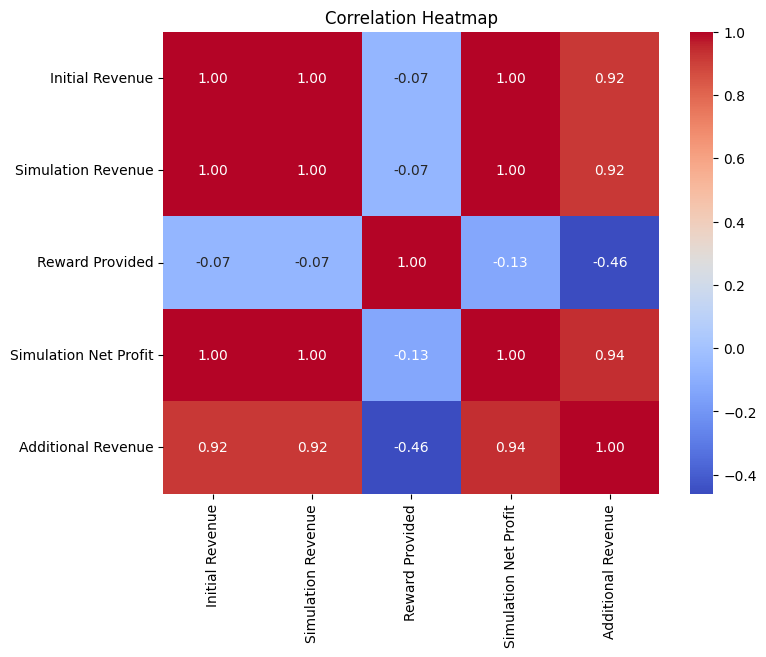

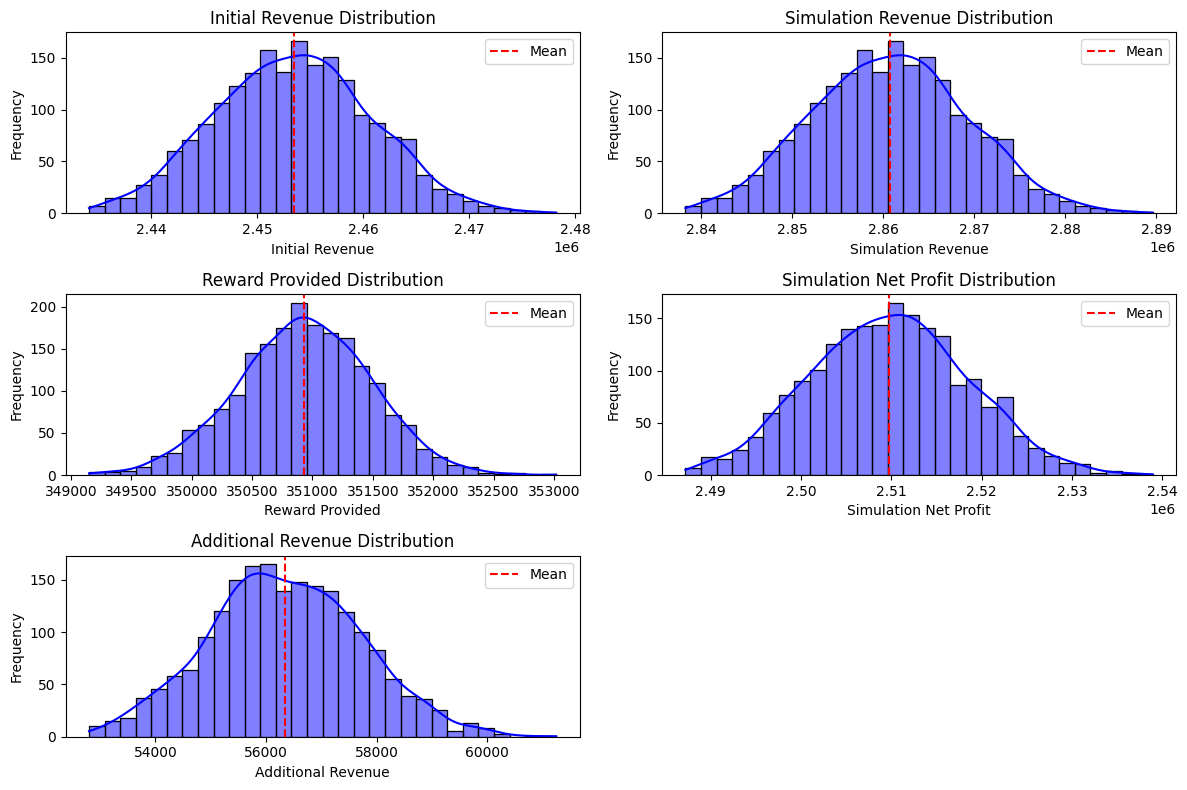


==== Analysis for Reward Combination: {'High': 7, 'Mid': 4, 'Low': 1, 'Very Low': 0} ====
Expected Values (Means):
54598.3145

Variances:
1892477.0991393197

Standard Deviations:
1375.6733257351905

95% Confidence Intervals:
Initial Revenue: 2453130.32 ~ 2453774.67
Simulation Revenue: 2860347.96 ~ 2861099.27
Reward Provided: 352648.19 ~ 352697.42
Simulation Net Profit: 2507672.77 ~ 2508428.84
Additional Revenue: 54538.02 ~ 54658.60

T-Test between Simulation Revenue and Initial Revenue: t-stat=1612.96, p-value=0.0000

Correlation Matrix:
                       Initial Revenue  Simulation Revenue  Reward Provided  \
Initial Revenue               1.000000            1.000000        -0.064098   
Simulation Revenue            1.000000            1.000000        -0.064100   
Reward Provided              -0.064098           -0.064100         1.000000   
Simulation Net Profit         0.997887            0.997887        -0.128808   
Additional Revenue            0.913234            0.913235  

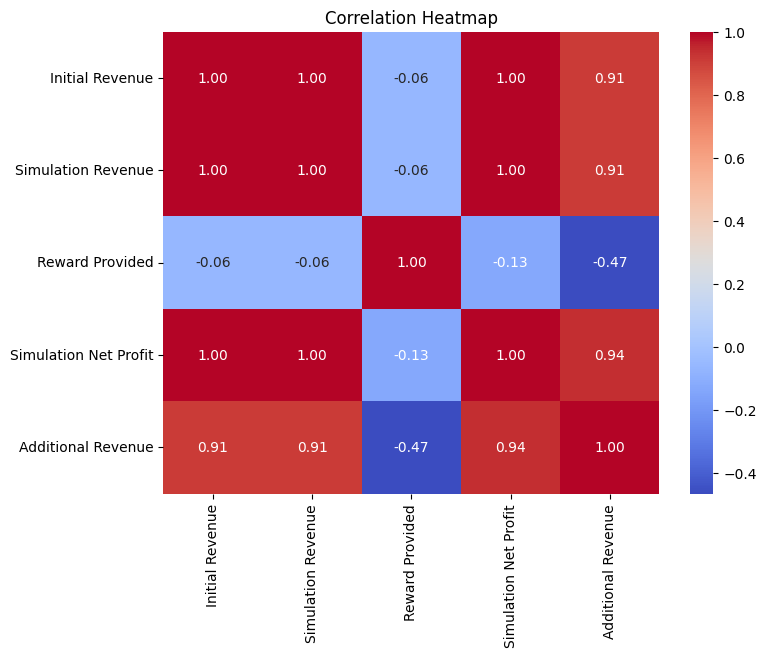

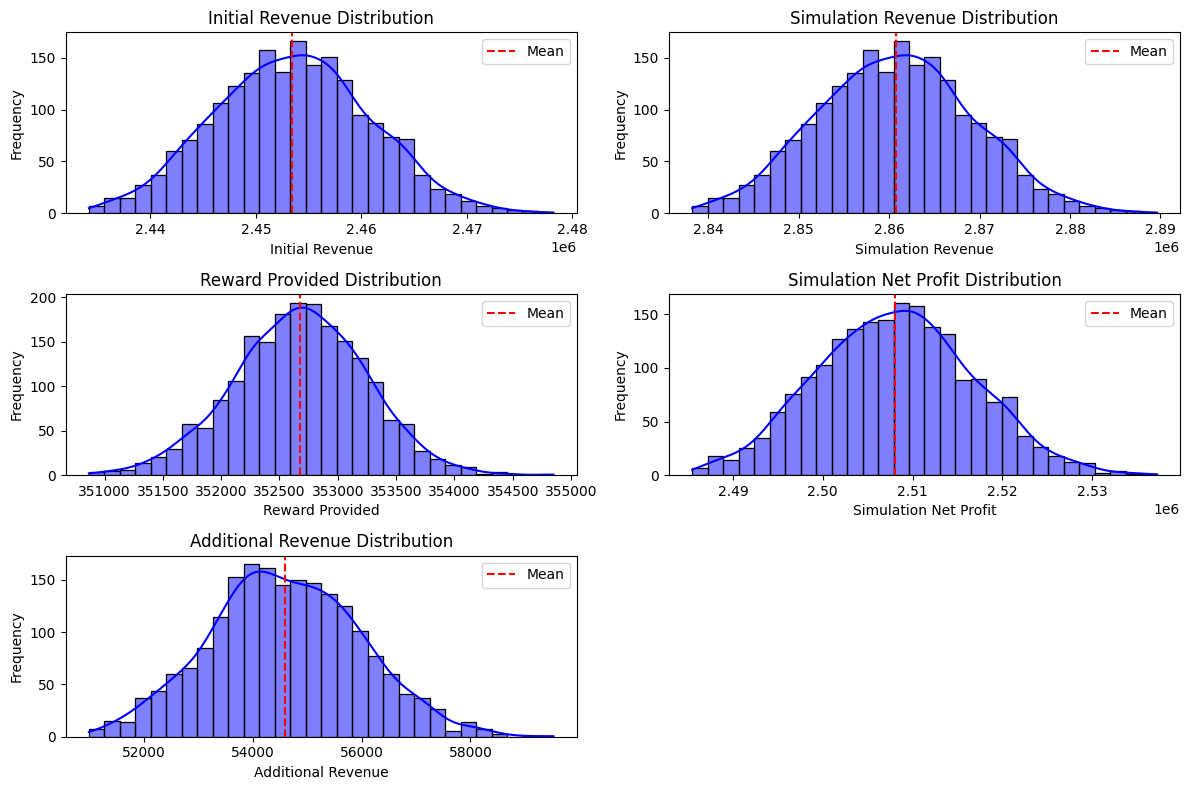


==== Analysis for Reward Combination: {'High': 8, 'Mid': 4, 'Low': 1, 'Very Low': 0} ====
Expected Values (Means):
52854.084

Variances:
1907998.038963482

Standard Deviations:
1381.3030221365195

95% Confidence Intervals:
Initial Revenue: 2453130.32 ~ 2453774.67
Simulation Revenue: 2860347.96 ~ 2861099.27
Reward Provided: 354391.79 ~ 354442.28
Simulation Net Profit: 2505928.52 ~ 2506684.64
Additional Revenue: 52793.55 ~ 52914.62

T-Test between Simulation Revenue and Initial Revenue: t-stat=1612.96, p-value=0.0000

Correlation Matrix:
                       Initial Revenue  Simulation Revenue  Reward Provided  \
Initial Revenue               1.000000            1.000000        -0.061924   
Simulation Revenue            1.000000            1.000000        -0.061926   
Reward Provided              -0.061924           -0.061926         1.000000   
Simulation Net Profit         0.997777            0.997777        -0.128303   
Additional Revenue            0.909272            0.909273    

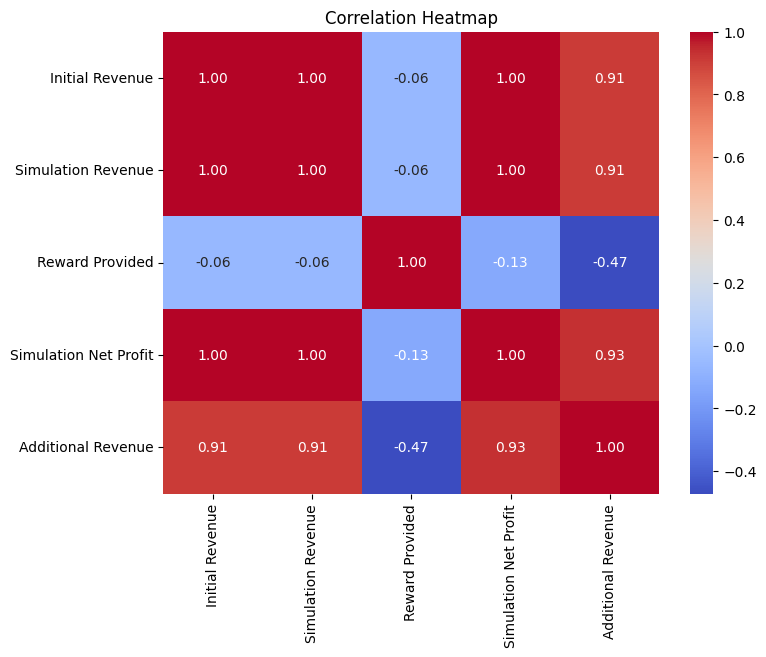

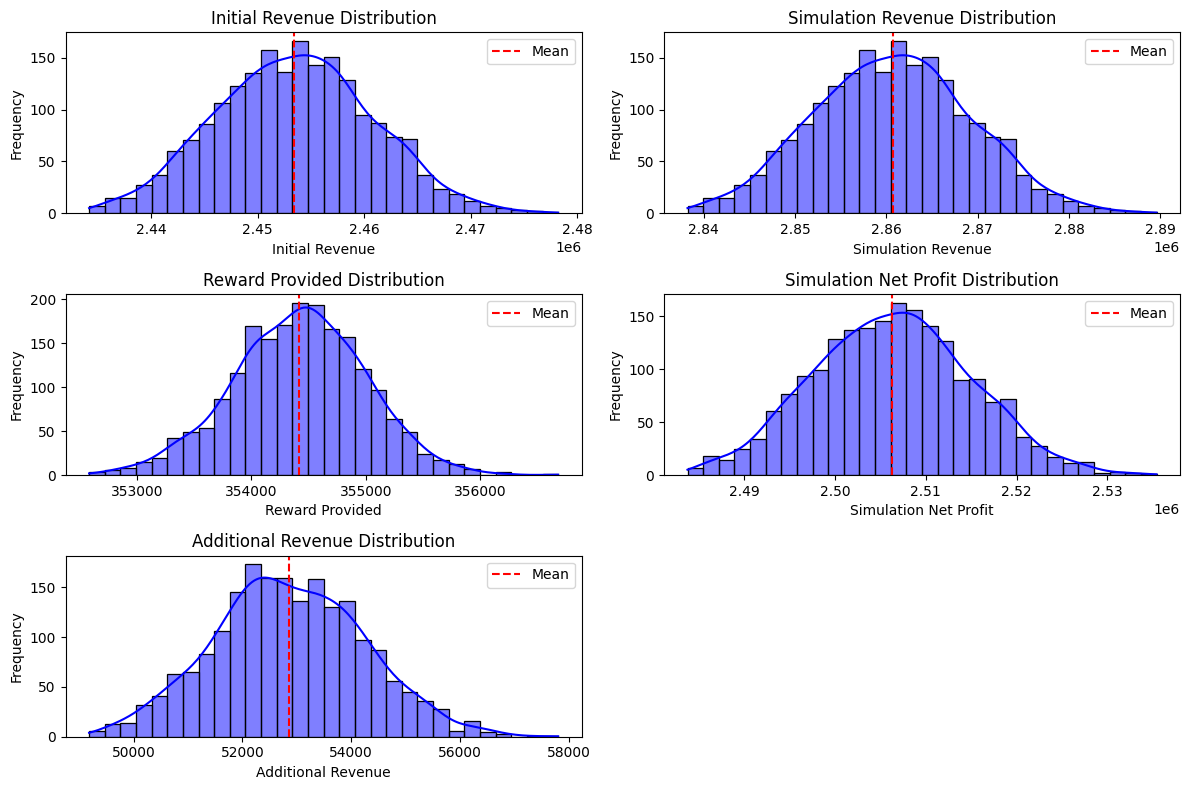


==== Analysis for Reward Combination: {'High': 9, 'Mid': 4, 'Low': 1, 'Very Low': 0} ====
Expected Values (Means):
51109.8535

Variances:
1926985.2506630816

Standard Deviations:
1388.158942867524

95% Confidence Intervals:
Initial Revenue: 2453130.32 ~ 2453774.67
Simulation Revenue: 2860347.96 ~ 2861099.27
Reward Provided: 356135.28 ~ 356187.25
Simulation Net Profit: 2504184.25 ~ 2504940.45
Additional Revenue: 51049.02 ~ 51170.69

T-Test between Simulation Revenue and Initial Revenue: t-stat=1612.96, p-value=0.0000

Correlation Matrix:
                       Initial Revenue  Simulation Revenue  Reward Provided  \
Initial Revenue               1.000000            1.000000        -0.059596   
Simulation Revenue            1.000000            1.000000        -0.059598   
Reward Provided              -0.059596           -0.059598         1.000000   
Simulation Net Profit         0.997644            0.997644        -0.127941   
Additional Revenue            0.904542            0.904543   

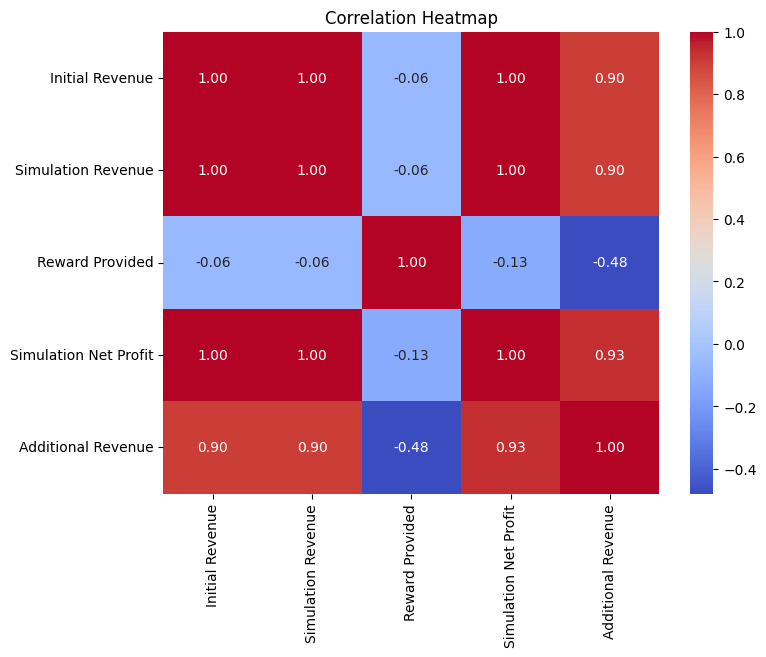

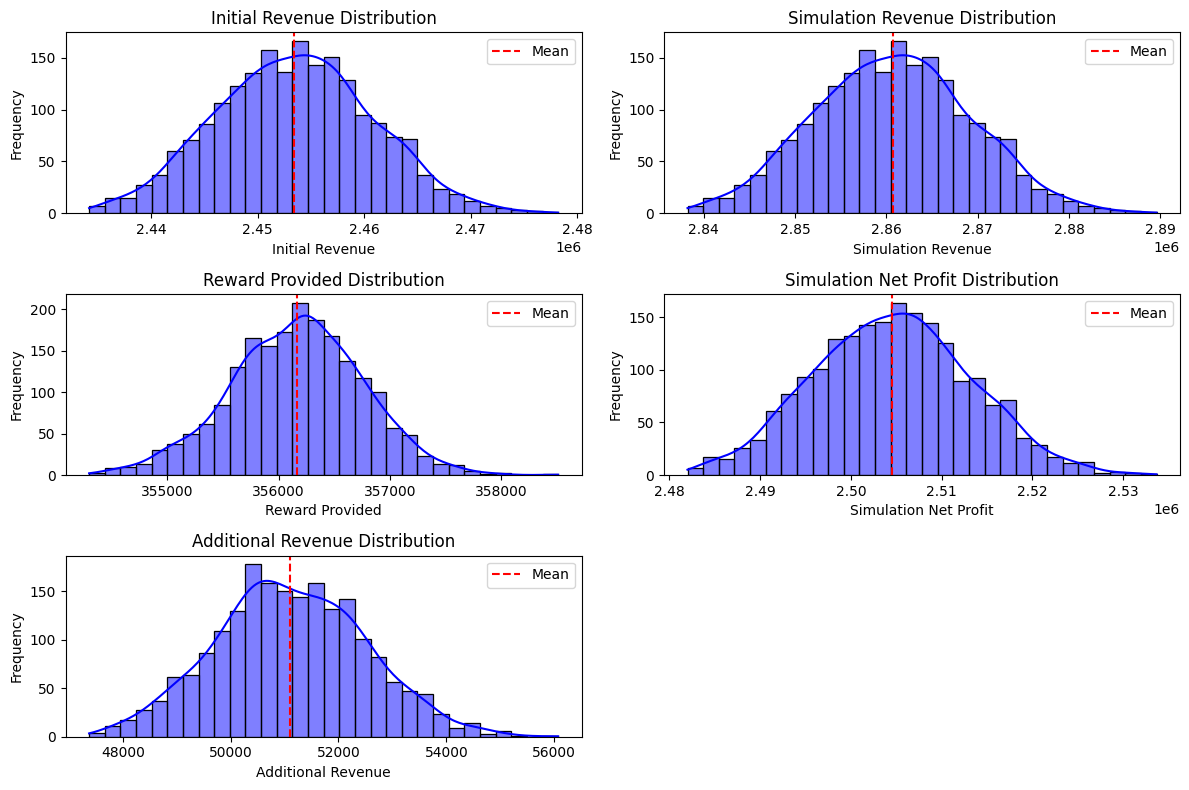


==== Analysis for Reward Combination: {'High': 9, 'Mid': 3, 'Low': 2, 'Very Low': 0} ====
Expected Values (Means):
109201.1255

Variances:
1697550.347923712

Standard Deviations:
1302.900743696047

95% Confidence Intervals:
Initial Revenue: 2453130.32 ~ 2453774.67
Simulation Revenue: 2860347.96 ~ 2861099.27
Reward Provided: 298051.38 ~ 298088.61
Simulation Net Profit: 2562277.00 ~ 2563030.24
Additional Revenue: 109144.02 ~ 109258.23

T-Test between Simulation Revenue and Initial Revenue: t-stat=1612.96, p-value=0.0000

Correlation Matrix:
                       Initial Revenue  Simulation Revenue  Reward Provided  \
Initial Revenue               1.000000            1.000000        -0.026956   
Simulation Revenue            1.000000            1.000000        -0.026957   
Reward Provided              -0.026956           -0.026957         1.000000   
Simulation Net Profit         0.998778            0.998778        -0.076318   
Additional Revenue            0.945400            0.945400 

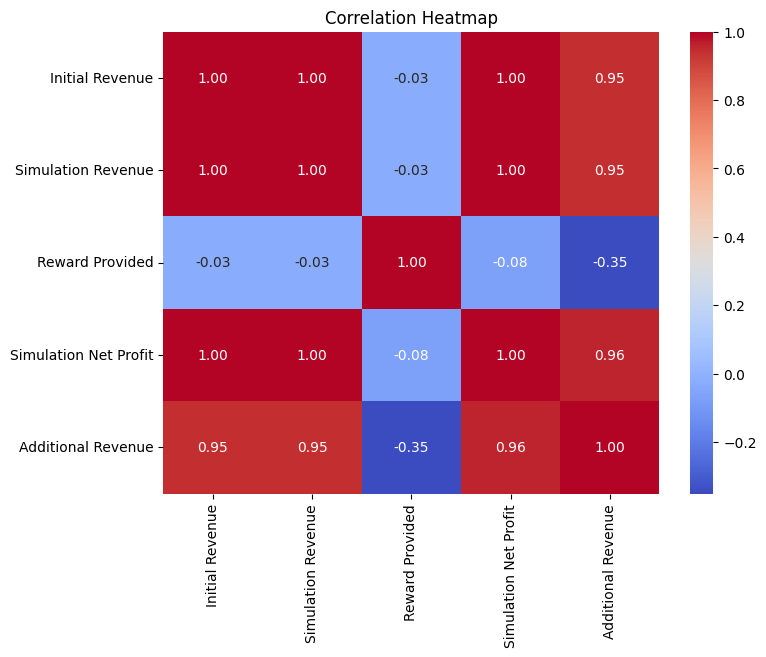

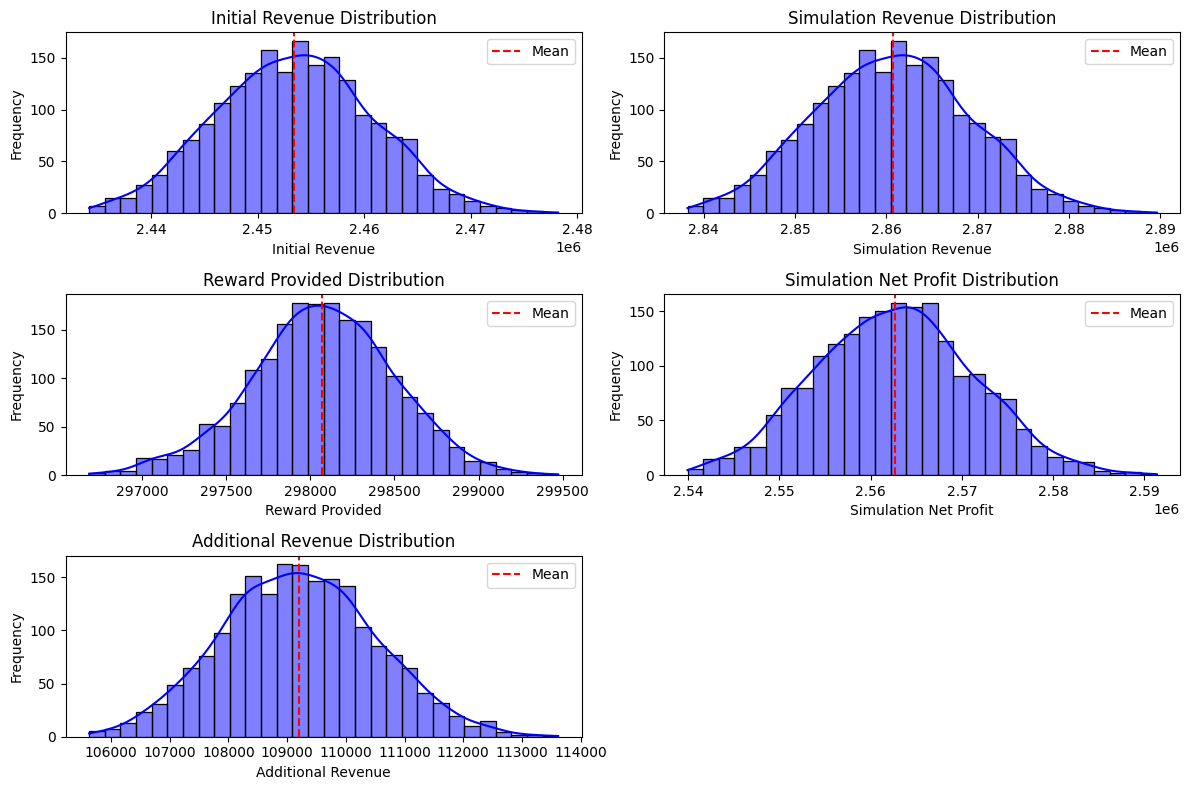


==== Analysis for Reward Combination: {'High': 8, 'Mid': 3, 'Low': 2, 'Very Low': 0} ====
Expected Values (Means):
110945.356

Variances:
1677199.1408344172

Standard Deviations:
1295.0672340980668

95% Confidence Intervals:
Initial Revenue: 2453130.32 ~ 2453774.67
Simulation Revenue: 2860347.96 ~ 2861099.27
Reward Provided: 296308.27 ~ 296343.25
Simulation Net Profit: 2564021.27 ~ 2564774.43
Additional Revenue: 110888.60 ~ 111002.11

T-Test between Simulation Revenue and Initial Revenue: t-stat=1612.96, p-value=0.0000

Correlation Matrix:
                       Initial Revenue  Simulation Revenue  Reward Provided  \
Initial Revenue               1.000000            1.000000        -0.029522   
Simulation Revenue            1.000000            1.000000        -0.029523   
Reward Provided              -0.029522           -0.029523         1.000000   
Simulation Net Profit         0.998922            0.998922        -0.075897   
Additional Revenue            0.951375            0.951375

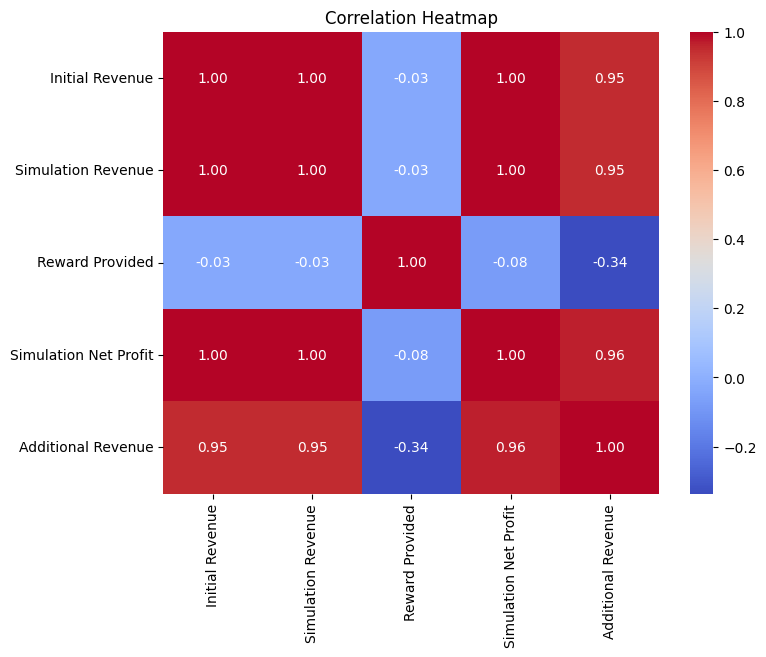

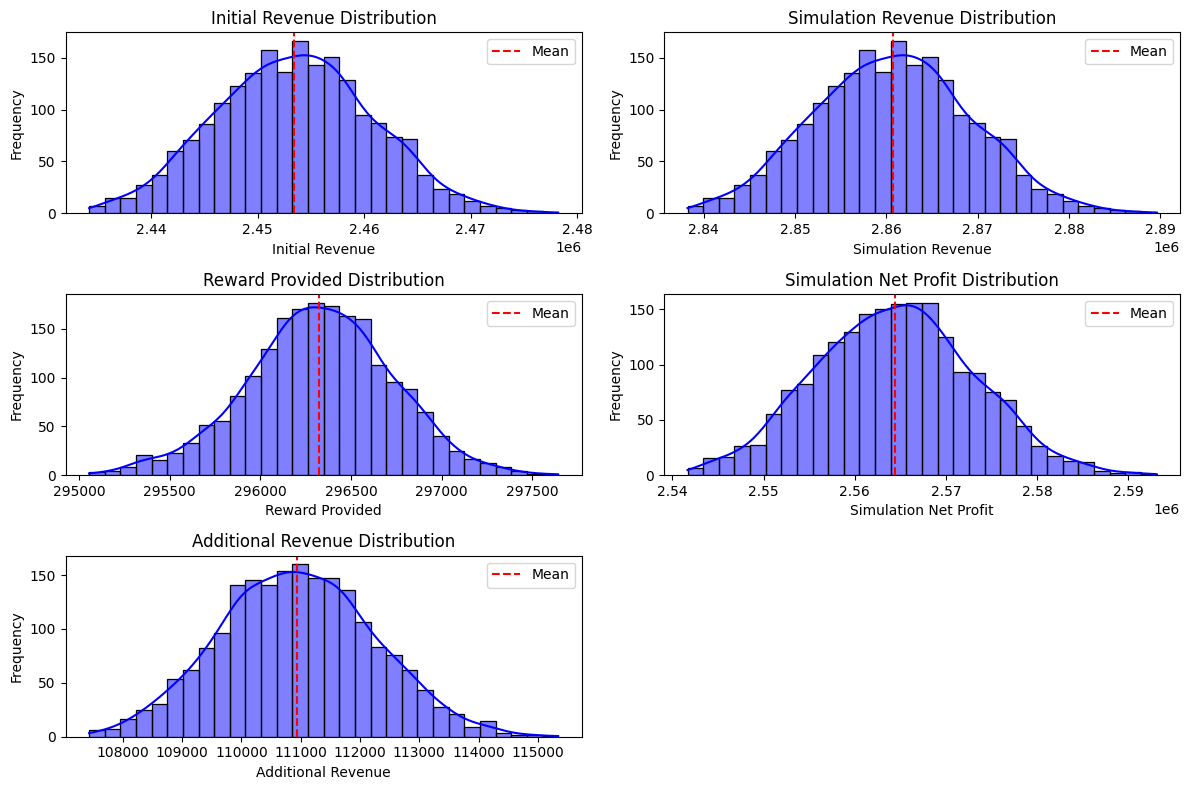


==== Analysis for Reward Combination: {'High': 7, 'Mid': 3, 'Low': 2, 'Very Low': 0} ====
Expected Values (Means):
112689.5865

Variances:
1660314.2056205603

Standard Deviations:
1288.531802331848

95% Confidence Intervals:
Initial Revenue: 2453130.32 ~ 2453774.67
Simulation Revenue: 2860347.96 ~ 2861099.27
Reward Provided: 294565.04 ~ 294598.02
Simulation Net Profit: 2565765.53 ~ 2566518.63
Additional Revenue: 112633.12 ~ 112746.06

T-Test between Simulation Revenue and Initial Revenue: t-stat=1612.96, p-value=0.0000

Correlation Matrix:
                       Initial Revenue  Simulation Revenue  Reward Provided  \
Initial Revenue               1.000000            1.000000        -0.032194   
Simulation Revenue            1.000000            1.000000        -0.032195   
Reward Provided              -0.032194           -0.032195         1.000000   
Simulation Net Profit         0.999042            0.999042        -0.075912   
Additional Revenue            0.956457            0.956458

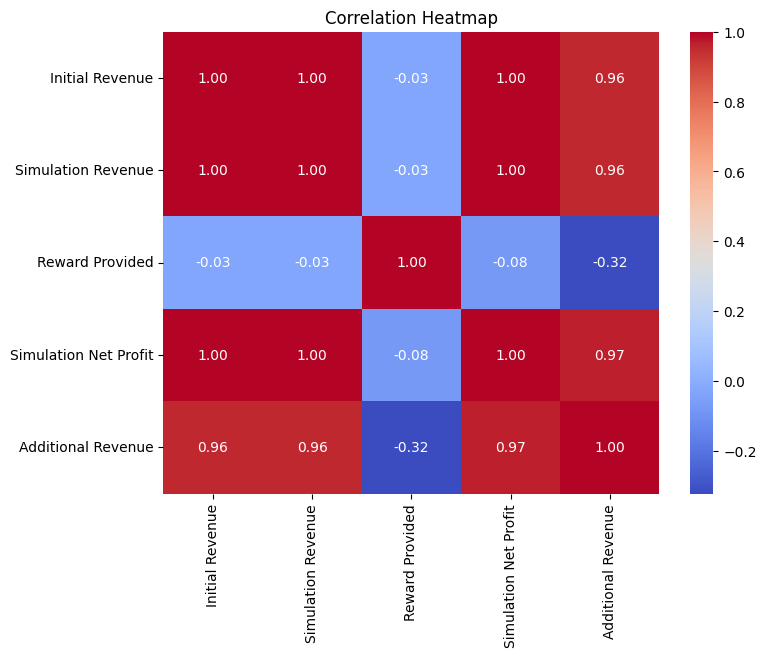

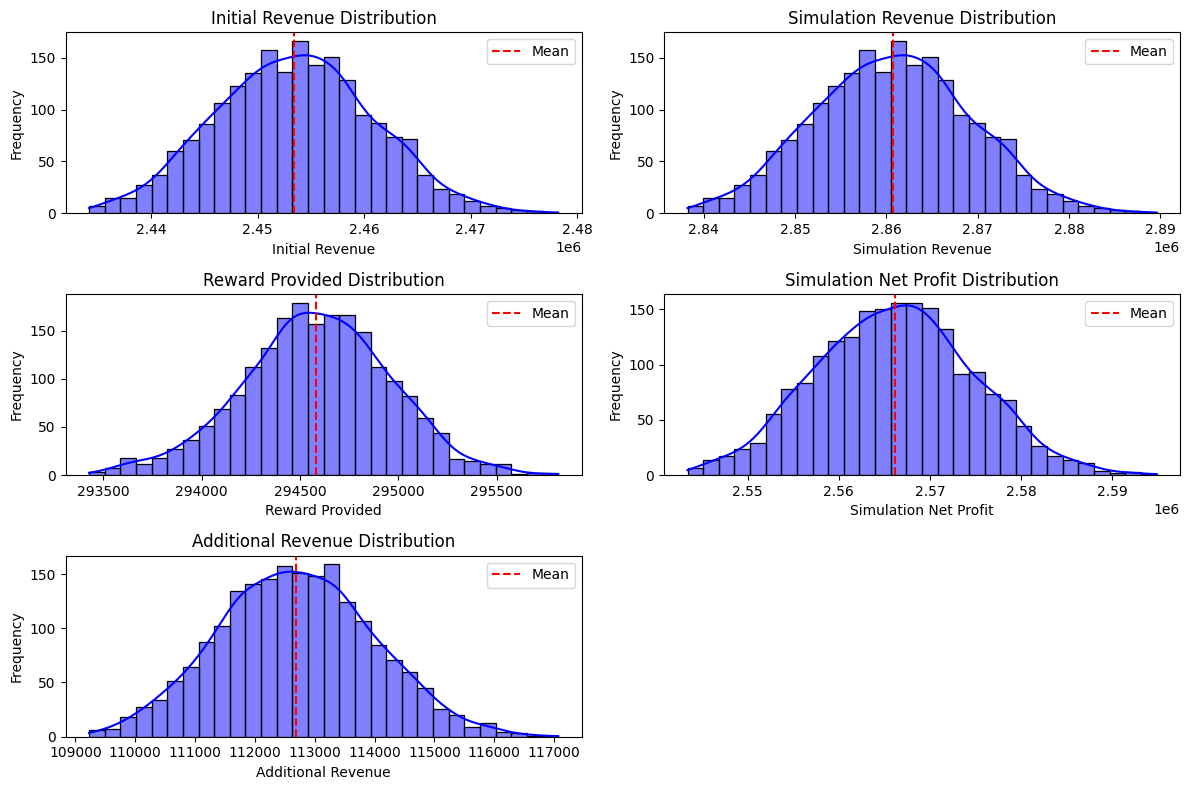


==== Analysis for Reward Combination: {'High': 6, 'Mid': 3, 'Low': 2, 'Very Low': 0} ====
Expected Values (Means):
114433.817

Variances:
1646895.5422821413

Standard Deviations:
1283.3142804013914

95% Confidence Intervals:
Initial Revenue: 2453130.32 ~ 2453774.67
Simulation Revenue: 2860347.96 ~ 2861099.27
Reward Provided: 292821.66 ~ 292852.94
Simulation Net Profit: 2567509.78 ~ 2568262.84
Additional Revenue: 114377.57 ~ 114490.06

T-Test between Simulation Revenue and Initial Revenue: t-stat=1612.96, p-value=0.0000

Correlation Matrix:
                       Initial Revenue  Simulation Revenue  Reward Provided  \
Initial Revenue               1.000000            1.000000        -0.034874   
Simulation Revenue            1.000000            1.000000        -0.034875   
Reward Provided              -0.034874           -0.034875         1.000000   
Simulation Net Profit         0.999138            0.999138        -0.076332   
Additional Revenue            0.960604            0.960605

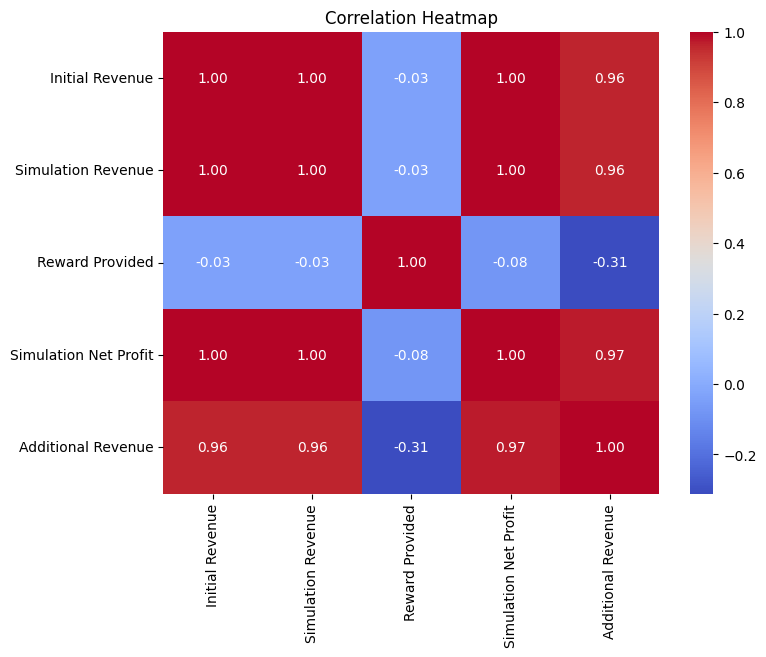

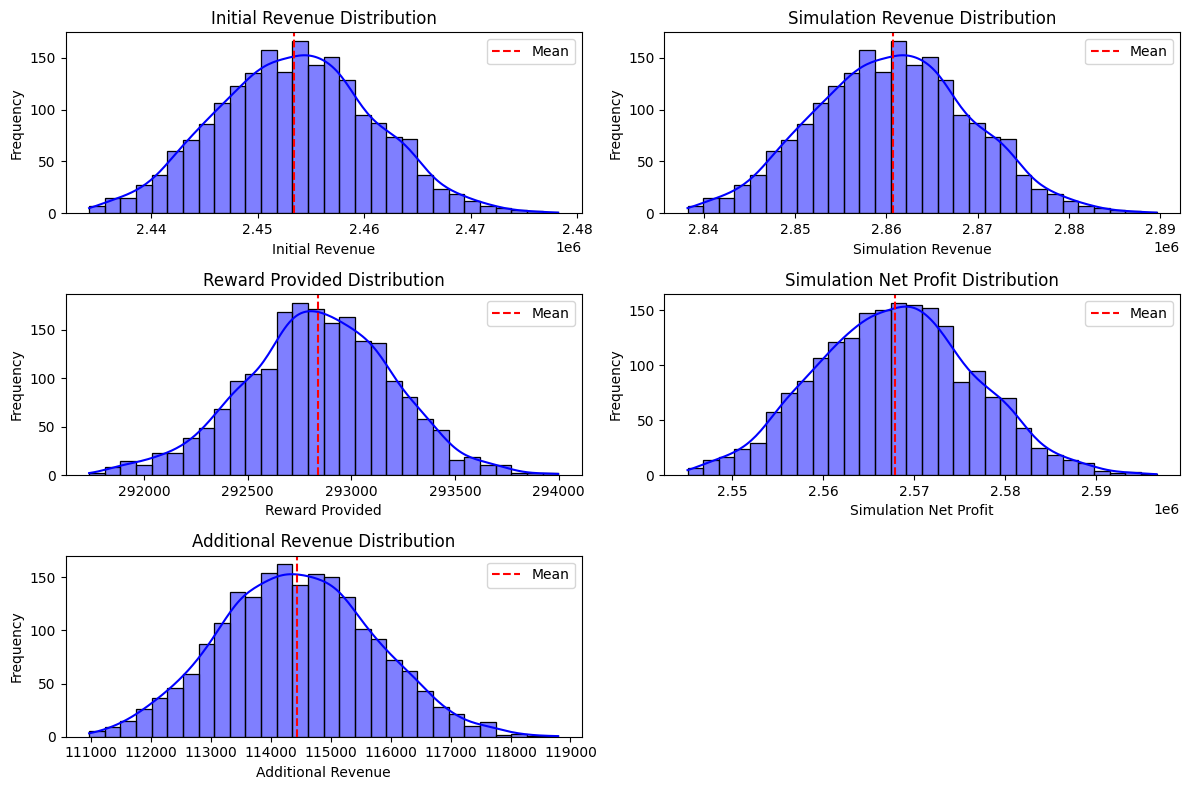

In [21]:
import numpy as np
import pandas as pd
from scipy.stats import norm, ttest_ind

reward_combinations_list, mean_list, var_list, std_list = [], [], [], []
# 결과 저장용 딕셔너리
reward_analysis_results = {}

for reward_combination in reward_combinations:
    print(f"\n==== Analysis for Reward Combination: {reward_combination} ====")
    group = simulation_df[simulation_df['Reward Combination']==reward_combination]
    # 1. 기댓값 (Expected Value)
    expected_values = group['Additional Revenue'].mean()
    print("Expected Values (Means):")
    print(expected_values)

    # 2. 분산 및 표준편차
    variances = group['Additional Revenue'].var()
    std_devs = group['Additional Revenue'].std()
    print("\nVariances:")
    print(variances)
    print("\nStandard Deviations:")
    print(std_devs)
    reward_combinations_list.append(reward_combination)
    mean_list.append(expected_values)
    var_list.append(variances)
    std_list.append(std_devs)
    # 3. 신뢰 구간 (95% Confidence Interval)
    confidence = 0.95
    confidence_intervals = {}
    for col in ['Initial Revenue', 'Simulation Revenue', 'Reward Provided', 'Simulation Net Profit', 'Additional Revenue']:
        mean = group[col].mean()
        std_error = group[col].std() / np.sqrt(len(group))  # 표준 오차
        ci_lower, ci_upper = norm.interval(confidence, loc=mean, scale=std_error)
        confidence_intervals[col] = (ci_lower, ci_upper)
    print("\n95% Confidence Intervals:")
    for col, ci in confidence_intervals.items():
        print(f"{col}: {ci[0]:.2f} ~ {ci[1]:.2f}")

    # 4. t-test (정책 효과 비교)
    # 가정: Simulation Revenue와 Initial Revenue의 차이가 유의미한지 검정
    t_stat, p_value = ttest_ind(group['Simulation Revenue'], group['Initial Revenue'], equal_var=False)
    print(f"\nT-Test between Simulation Revenue and Initial Revenue: t-stat={t_stat:.2f}, p-value={p_value:.4f}")

    # 5. 상관관계 분석
    correlation_matrix = group[['Initial Revenue', 'Simulation Revenue', 'Reward Provided', 'Simulation Net Profit', 'Additional Revenue']].corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)

    # 시각화 (상관 분석 히트맵)
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()
    
    # 분포를 확인할 주요 컬럼 리스트
    columns_to_plot = [    'Initial Revenue',
    'Simulation Revenue',
    'Reward Provided',
    'Simulation Net Profit',
    'Additional Revenue']

    # 분포 그래프 그리기
    plt.figure(figsize=(12, 8))

    for i, col in enumerate(columns_to_plot, 1):
        plt.subplot(3, 2, i)  # 3행 2열 그래프 배치
        sns.histplot(group[col], kde=True, bins=30, color='blue')
        plt.title(f"{col} Distribution")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.axvline(group[col].mean(), color='red', linestyle='--', label='Mean')
        plt.legend()

    plt.tight_layout()
    plt.show()


distribution_df = pd.DataFrame({
        'trust_level': reward_combinations_list,
        'expect_value' : mean_list,
        'var' : var_list,
        'std' : std_list
    })

# 5. 모든 조합의 reward_combination으로 시뮬레이션

## 시뮬레이션

In [36]:
reward_combinations = []

very_low_reward = 0  # 디폴트 0
reward_min = 3
reward_max = 9
for i in range(reward_min, reward_max+1):
    # 랜덤 리워드 금액 설정
    high_reward = i
    for j in range(2,int(round(i*2/3))+1):
        mid_reward = j
        for k in range(1,int(round(j*2/3))+1):
            low_reward = k
            reward_combinations.append({
                'High': high_reward,
                'Mid': mid_reward,
                'Low': low_reward,
                'Very Low': very_low_reward
            })
increase_rate_combinations = [inbcrease_rate * 0.01]

all_combinations = list(product(reward_combinations, increase_rate_combinations))


# 시뮬레이션 결과 저장
final_results = []

n_simulation = 2000

for _ in tqdm(range(n_simulation)):

    simulation_results = []

    simulated_trust_levels = np.random.choice(trust_level_probs.index, p=trust_level_probs.values, size=radom_data_size)

    simulated_payment_values = [
        generate_random_value(trust, stats) for trust in simulated_trust_levels
    ]
    temp_df = pd.DataFrame({
        'trust_level': simulated_trust_levels,
        'payment_value': simulated_payment_values
    })

   
    # 모든 조합에 대해 시뮬레이션 실행

    for reward_amounts, increase_rates in all_combinations:
        # Trust level별 초기 총 수익(판매 대금의 10%) 계산
        initial_revenues = {level: int(temp_df[temp_df['trust_level'] == level]['payment_value'].sum() * 0.1) for level in temp_df['trust_level'].unique()}
        initial_trust_distribution = temp_df['trust_level'].value_counts(normalize=True).to_dict()
        
        # 초기 수익 및 시뮬레이션 계산
        initial_total_revenue = sum(initial_revenues.values())
        reward_provided_total = 0
        simulation_total_revenue = 0

        for trust_level, reward in reward_amounts.items():
            # 리워드 제공액 계산
            trust_level_count = len(temp_df[temp_df['trust_level'] == trust_level])
            reward_provided = reward * trust_level_count
            reward_provided_total += reward_provided
            
            # 구매 증가율에 따른 시뮬레이션 수익
            initial_revenue = initial_revenues.get(trust_level, 0)

            simulation_revenue = int(initial_revenue * (1 + increase_rates))
            simulation_total_revenue += simulation_revenue
        
        # 시뮬레이션 순수익
        simulation_net_profit = simulation_total_revenue - reward_provided_total
        
        # 리워드 제공에 따른 추가 수익
        additional_revenue = simulation_net_profit - initial_total_revenue
        
        # 시뮬레이션 결과 저장
        simulation_results.append({
            'Reward Combination': reward_amounts,
            'Increase Rate Combination': round(increase_rates*100,1),
            'Initial Revenue': initial_total_revenue,
            'Simulation Revenue': simulation_total_revenue,
            'Reward Provided': reward_provided_total,
            'Simulation Net Profit': simulation_net_profit,
            'Additional Revenue': additional_revenue
        })
    # 현재 시뮬레이션 결과 저장
    final_results.extend(simulation_results)


  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [2:13:46<00:00,  4.01s/it]  


In [37]:
simulation_df_with_all_reward = pd.DataFrame(final_results)

In [ ]:
# import ast
# # 'Reward Combination' 컬럼의 값을 문자열로 변환
# simulation_df_with_all_reward['Reward Combination'] = simulation_df_with_all_reward['Reward Combination'].apply(lambda x: str(x))

# # 'Reward Combination' 컬럼의 값을 딕셔너리로 변환
# simulation_df_with_all_reward['Reward Combination'] = simulation_df_with_all_reward['Reward Combination'].apply(lambda x: ast.literal_eval(x))


## 통계값

In [47]:
import numpy as np
import pandas as pd
from scipy.stats import norm, ttest_ind

reward_combinations_list, mean_list, var_list, std_list = [], [], [], []
# 결과 저장용 딕셔너리
reward_analysis_results = {}

for reward_combination in reward_combinations:
    print(f"\n==== Analysis for Reward Combination: {reward_combination} ====")
    group = simulation_df_with_all_reward[simulation_df_with_all_reward['Reward Combination']== reward_combination]
    # 1. 기댓값 (Expected Value)
    expected_values = group['Additional Revenue'].mean()
    print("Expected Values (Means):")
    print(expected_values)

    # 2. 분산 및 표준편차
    variances = group['Additional Revenue'].var()
    std_devs = group['Additional Revenue'].std()
    print("\nVariances:")
    print(variances)
    print("\nStandard Deviations:")
    print(std_devs)
    reward_combinations_list.append(reward_combination)
    mean_list.append(expected_values)
    var_list.append(variances)
    std_list.append(std_devs)
    # 3. 신뢰 구간 (95% Confidence Interval)
    confidence = 0.95
    confidence_intervals = {}
    for col in ['Initial Revenue', 'Simulation Revenue', 'Reward Provided', 'Simulation Net Profit', 'Additional Revenue']:
        mean = group[col].mean()
        std_error = group[col].std() / np.sqrt(len(group))  # 표준 오차
        ci_lower, ci_upper = norm.interval(confidence, loc=mean, scale=std_error)
        confidence_intervals[col] = (ci_lower, ci_upper)
    print("\n95% Confidence Intervals:")
    for col, ci in confidence_intervals.items():
        print(f"{col}: {ci[0]:.2f} ~ {ci[1]:.2f}")

    # 4. t-test (정책 효과 비교)
    # 가정: Simulation Revenue와 Initial Revenue의 차이가 유의미한지 검정
    t_stat, p_value = ttest_ind(group['Simulation Revenue'], group['Initial Revenue'], equal_var=False)
    print(f"\nT-Test between Simulation Revenue and Initial Revenue: t-stat={t_stat:.2f}, p-value={p_value:.4f}")

    # 5. 상관관계 분석
    correlation_matrix = group[['Initial Revenue', 'Simulation Revenue', 'Reward Provided', 'Simulation Net Profit', 'Additional Revenue']].corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)

    
distribution_df = pd.DataFrame({
        'trust_level': reward_combinations_list,
        'expect_value' : mean_list,
        'var' : var_list,
        'std' : std_list
    })


==== Analysis for Reward Combination: {'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0} ====
Expected Values (Means):
221041.8645

Variances:
1547709.6259527265

Standard Deviations:
1244.0697833934905

95% Confidence Intervals:
Initial Revenue: 2453401.60 ~ 2454032.87
Simulation Revenue: 2860664.26 ~ 2861400.32
Reward Provided: 186262.79 ~ 186283.59
Simulation Net Profit: 2674389.79 ~ 2675128.41
Additional Revenue: 220987.34 ~ 221096.39

T-Test between Simulation Revenue and Initial Revenue: t-stat=1646.57, p-value=0.0000

Correlation Matrix:
                       Initial Revenue  Simulation Revenue  Reward Provided  \
Initial Revenue               1.000000            1.000000        -0.109401   
Simulation Revenue            1.000000            1.000000        -0.109399   
Reward Provided              -0.109401           -0.109399         1.000000   
Simulation Net Profit         0.999608            0.999608        -0.137183   
Additional Revenue            0.981859            0.98185

In [48]:
# 상위 10개의 시뮬레이션 결과 출력
print("다양한 시뮬레이션 결과:")
distribution_df['distance_from_zero'] = abs(distribution_df['expect_value'])
distribution_df.sort_values(by=["distance_from_zero"],ascending=True)

다양한 시뮬레이션 결과:


,trust_level,expect_value,var,std,distance_from_zero
36,"{'High': 9, 'Mid': 4, 'Low': 3, 'Very Low': 0}",7917.8245,1.733645e+06,1316.679660,7917.8245
27,"{'High': 8, 'Mid': 4, 'Low': 3, 'Very Low': 0}",9663.5630,1.716347e+06,1310.094329,9663.5630
18,"{'High': 7, 'Mid': 4, 'Low': 3, 'Very Low': 0}",11409.3015,1.702474e+06,1304.788706,11409.3015
12,"{'High': 6, 'Mid': 4, 'Low': 3, 'Very Low': 0}",13155.0400,1.692025e+06,1300.778451,13155.0400
19,"{'High': 7, 'Mid': 5, 'Low': 1, 'Very Low': 0}",-25074.6010,2.150855e+06,1466.579379,25074.6010
28,"{'High': 8, 'Mid': 5, 'Low': 1, 'Very Low': 0}",-26820.3395,2.163222e+06,1470.789569,26820.3395
37,"{'High': 9, 'Mid': 5, 'Low': 1, 'Very Low': 0}",-28566.0780,2.179013e+06,1476.148173,28566.0780
35,"{'High': 9, 'Mid': 4, 'Low': 2, 'Very Low': 0}",29531.4585,1.822015e+06,1349.820381,29531.4585
26,"{'High': 8, 'Mid': 4, 'Low': 2, 'Very Low': 0}",31277.1970,1.804173e+06,1343.195192,31277.1970
17,"{'High': 7, 'Mid': 4, 'Low': 2, 'Very Low': 0}",33022.9355,1.789756e+06,1337.817693,33022.9355


{'High': 9, 'Mid': 4, 'Low': 3, 'Very Low': 0}	가 기준에 맞는 리워드

## 분포 (distribution_df.sort_values(by=["distance_from_zero"],ascending=True) 기준으로 상위 8개)

In [49]:
distribution_df_top8 = distribution_df.sort_values(by=["distance_from_zero"],ascending=True).reset_index(drop=True).iloc[0:7,:]
distribution_df_top8

,trust_level,expect_value,var,std,distance_from_zero
0,"{'High': 9, 'Mid': 4, 'Low': 3, 'Very Low': 0}",7917.8245,1.733645e+06,1316.679660,7917.8245
1,"{'High': 8, 'Mid': 4, 'Low': 3, 'Very Low': 0}",9663.5630,1.716347e+06,1310.094329,9663.5630
2,"{'High': 7, 'Mid': 4, 'Low': 3, 'Very Low': 0}",11409.3015,1.702474e+06,1304.788706,11409.3015
3,"{'High': 6, 'Mid': 4, 'Low': 3, 'Very Low': 0}",13155.0400,1.692025e+06,1300.778451,13155.0400
4,"{'High': 7, 'Mid': 5, 'Low': 1, 'Very Low': 0}",-25074.6010,2.150855e+06,1466.579379,25074.6010
5,"{'High': 8, 'Mid': 5, 'Low': 1, 'Very Low': 0}",-26820.3395,2.163222e+06,1470.789569,26820.3395
6,"{'High': 9, 'Mid': 5, 'Low': 1, 'Very Low': 0}",-28566.0780,2.179013e+06,1476.148173,28566.0780



==== Analysis for Reward Combination: {'High': 9, 'Mid': 4, 'Low': 3, 'Very Low': 0} ====
Expected Values (Means):
2461635.06

Variances:
71282948.7987994

Standard Deviations:
8442.923000880643

95% Confidence Intervals:
Initial Revenue: 2453401.60 ~ 2454032.87
Simulation Revenue: 2860664.26 ~ 2861400.32
Reward Provided: 399376.31 ~ 399418.15
Simulation Net Profit: 2461265.04 ~ 2462005.08
Additional Revenue: 7860.12 ~ 7975.53

T-Test between Simulation Revenue and Initial Revenue: t-stat=1646.57, p-value=0.0000


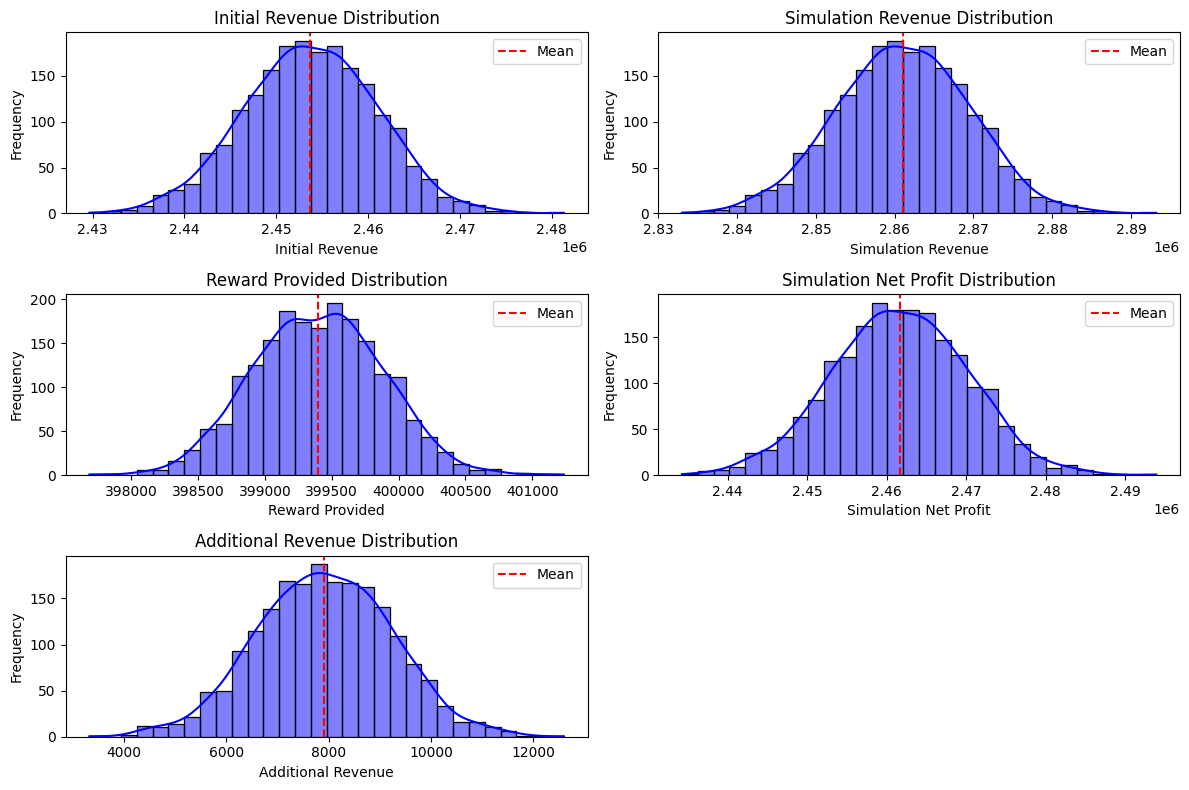


==== Analysis for Reward Combination: {'High': 8, 'Mid': 4, 'Low': 3, 'Very Low': 0} ====
Expected Values (Means):
2463380.7985

Variances:
71264466.39609578

Standard Deviations:
8441.828379924327

95% Confidence Intervals:
Initial Revenue: 2453401.60 ~ 2454032.87
Simulation Revenue: 2860664.26 ~ 2861400.32
Reward Provided: 397631.37 ~ 397671.61
Simulation Net Profit: 2463010.83 ~ 2463750.77
Additional Revenue: 9606.15 ~ 9720.98

T-Test between Simulation Revenue and Initial Revenue: t-stat=1646.57, p-value=0.0000


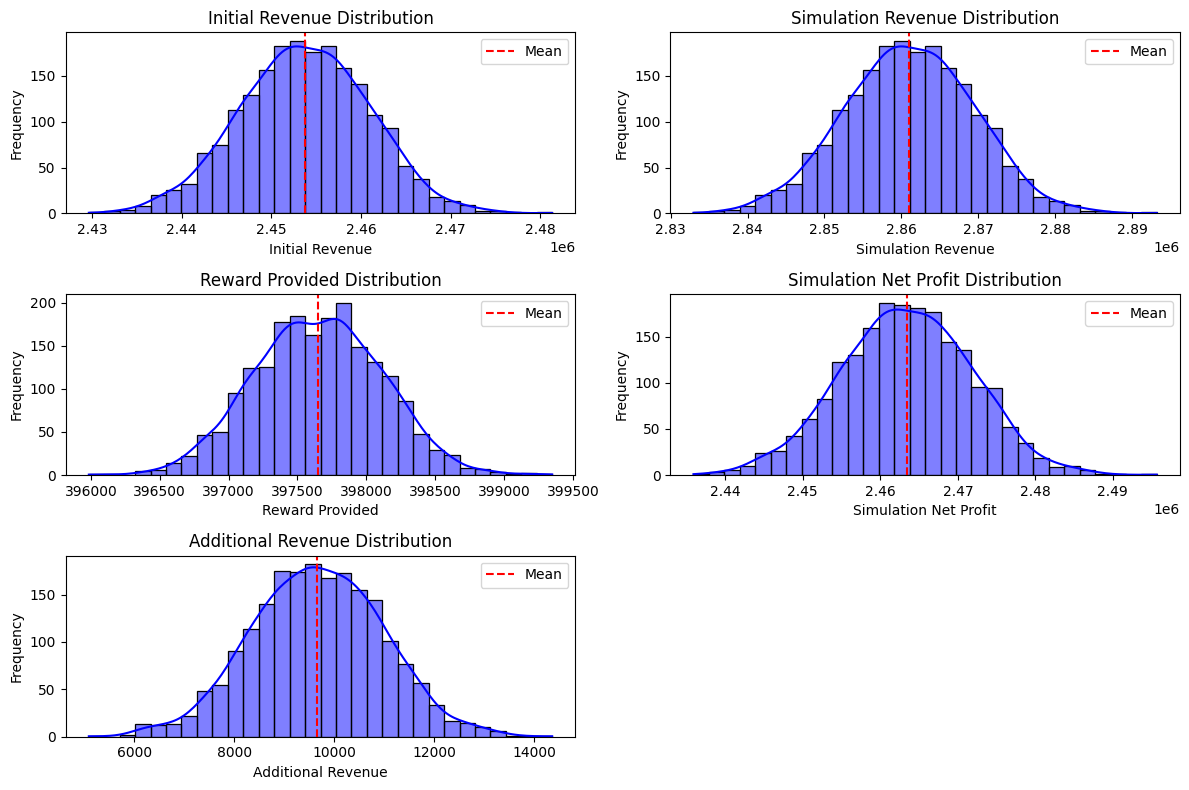


==== Analysis for Reward Combination: {'High': 7, 'Mid': 4, 'Low': 3, 'Very Low': 0} ====
Expected Values (Means):
2465126.537

Variances:
71249408.58592395

Standard Deviations:
8440.936475647944

95% Confidence Intervals:
Initial Revenue: 2453401.60 ~ 2454032.87
Simulation Revenue: 2860664.26 ~ 2861400.32
Reward Provided: 395886.30 ~ 395925.21
Simulation Net Profit: 2464756.60 ~ 2465496.47
Additional Revenue: 11352.12 ~ 11466.49

T-Test between Simulation Revenue and Initial Revenue: t-stat=1646.57, p-value=0.0000


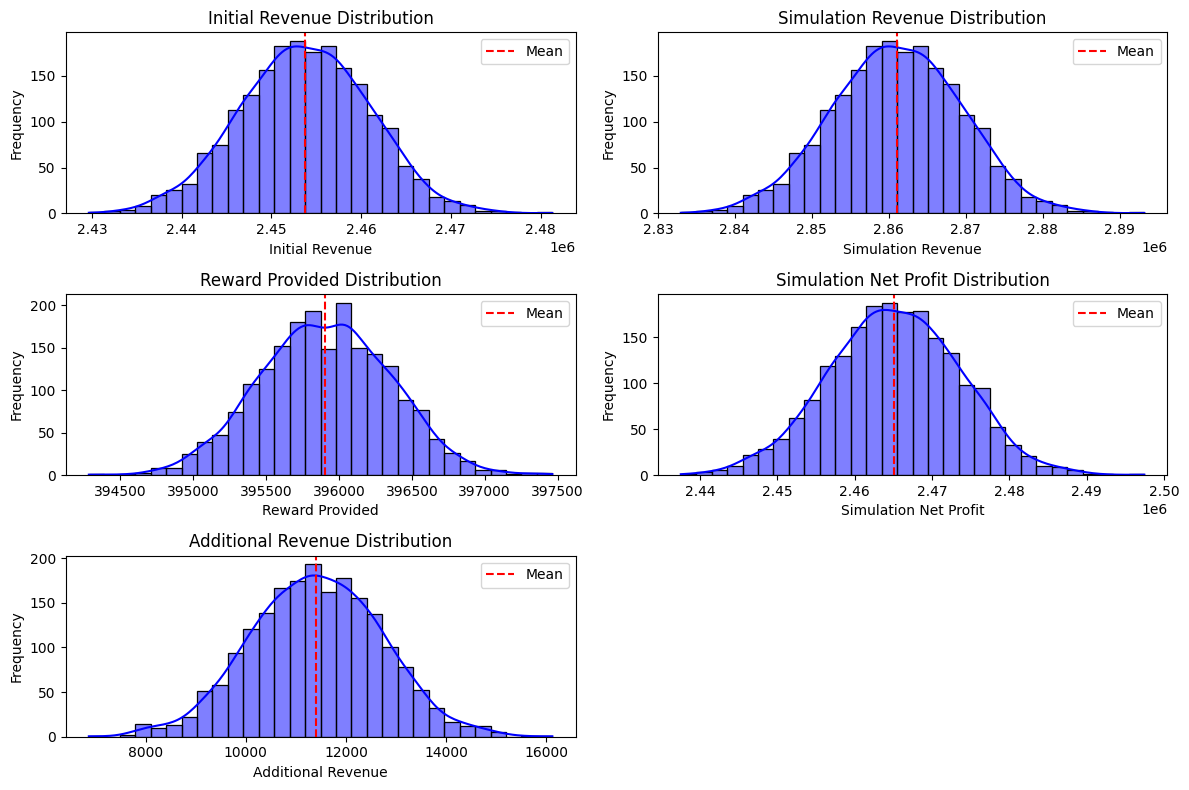


==== Analysis for Reward Combination: {'High': 6, 'Mid': 4, 'Low': 3, 'Very Low': 0} ====
Expected Values (Means):
2466872.2755

Variances:
71237775.36828388

Standard Deviations:
8440.247352316394

95% Confidence Intervals:
Initial Revenue: 2453401.60 ~ 2454032.87
Simulation Revenue: 2860664.26 ~ 2861400.32
Reward Provided: 394141.07 ~ 394178.96
Simulation Net Profit: 2466502.37 ~ 2467242.18
Additional Revenue: 13098.03 ~ 13212.05

T-Test between Simulation Revenue and Initial Revenue: t-stat=1646.57, p-value=0.0000


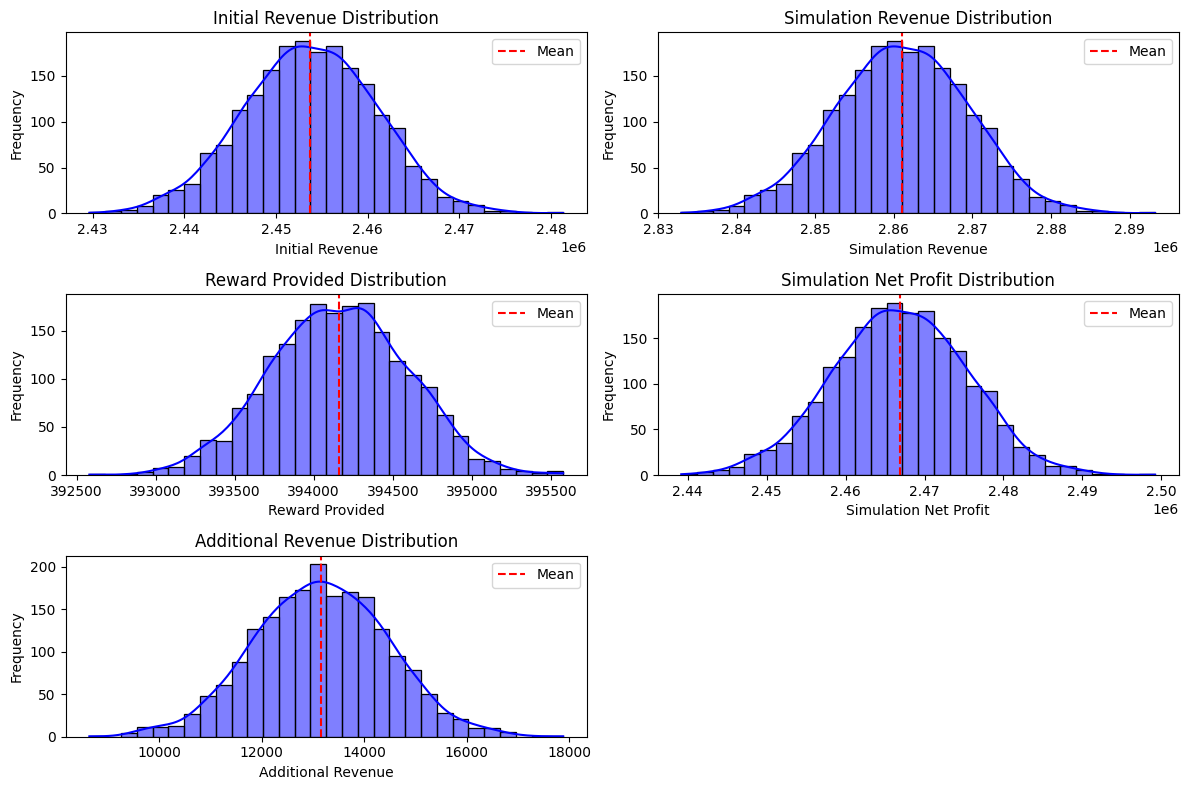


==== Analysis for Reward Combination: {'High': 7, 'Mid': 5, 'Low': 1, 'Very Low': 0} ====
Expected Values (Means):
2428642.6345

Variances:
72608959.86384168

Standard Deviations:
8521.089124275235

95% Confidence Intervals:
Initial Revenue: 2453401.60 ~ 2454032.87
Simulation Revenue: 2860664.26 ~ 2861400.32
Reward Provided: 432358.85 ~ 432420.46
Simulation Net Profit: 2428269.19 ~ 2429016.08
Additional Revenue: -25138.88 ~ -25010.33

T-Test between Simulation Revenue and Initial Revenue: t-stat=1646.57, p-value=0.0000


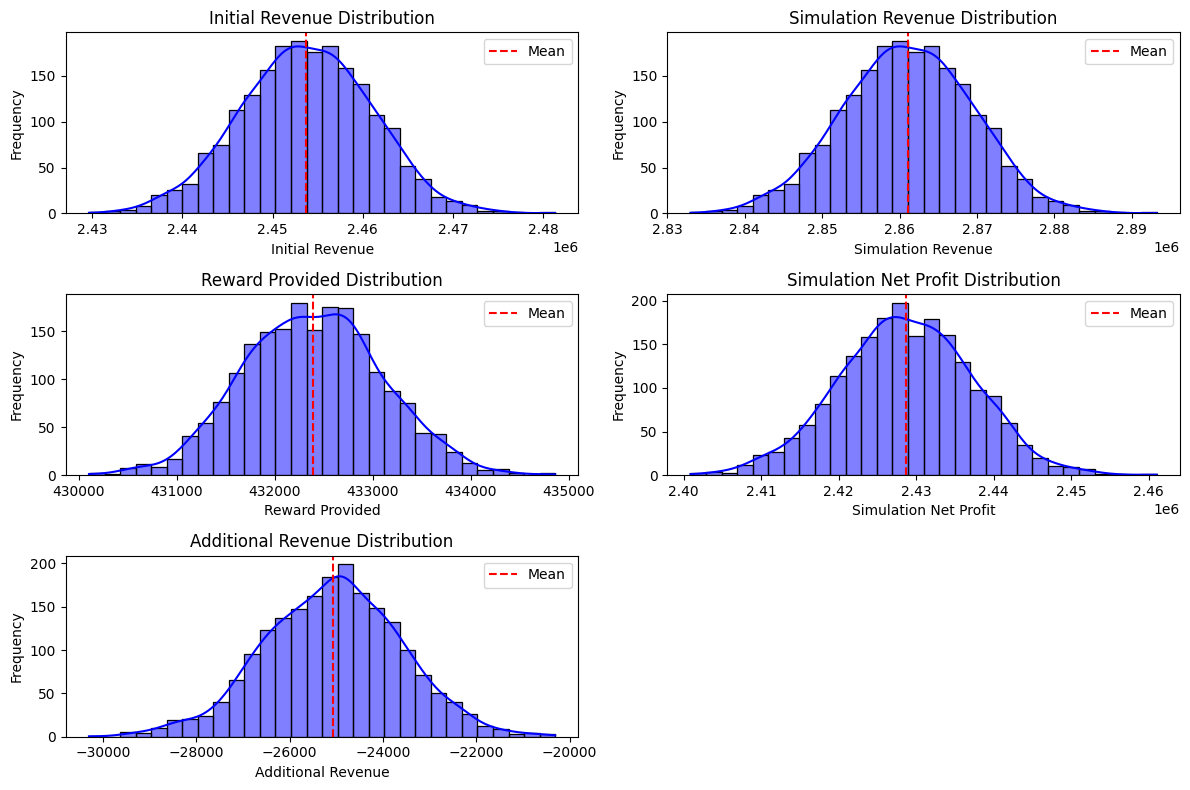


==== Analysis for Reward Combination: {'High': 8, 'Mid': 5, 'Low': 1, 'Very Low': 0} ====
Expected Values (Means):
2426896.896

Variances:
72622510.97066934

Standard Deviations:
8521.884238281422

95% Confidence Intervals:
Initial Revenue: 2453401.60 ~ 2454032.87
Simulation Revenue: 2860664.26 ~ 2861400.32
Reward Provided: 434104.21 ~ 434166.58
Simulation Net Profit: 2426523.41 ~ 2427270.38
Additional Revenue: -26884.80 ~ -26755.88

T-Test between Simulation Revenue and Initial Revenue: t-stat=1646.57, p-value=0.0000


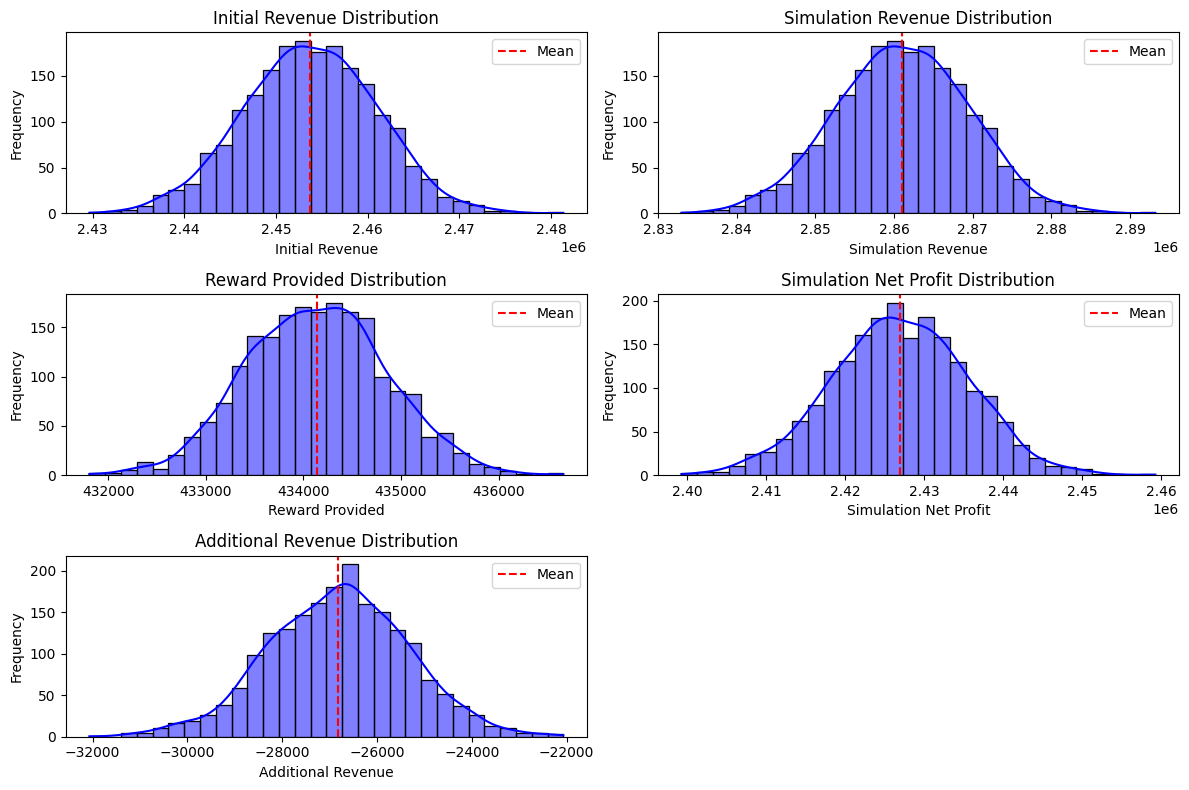


==== Analysis for Reward Combination: {'High': 9, 'Mid': 5, 'Low': 1, 'Very Low': 0} ====
Expected Values (Means):
2425151.1575

Variances:
72639486.67002876

Standard Deviations:
8522.880186300214

95% Confidence Intervals:
Initial Revenue: 2453401.60 ~ 2454032.87
Simulation Revenue: 2860664.26 ~ 2861400.32
Reward Provided: 435849.47 ~ 435912.79
Simulation Net Profit: 2424777.63 ~ 2425524.68
Additional Revenue: -28630.77 ~ -28501.38

T-Test between Simulation Revenue and Initial Revenue: t-stat=1646.57, p-value=0.0000


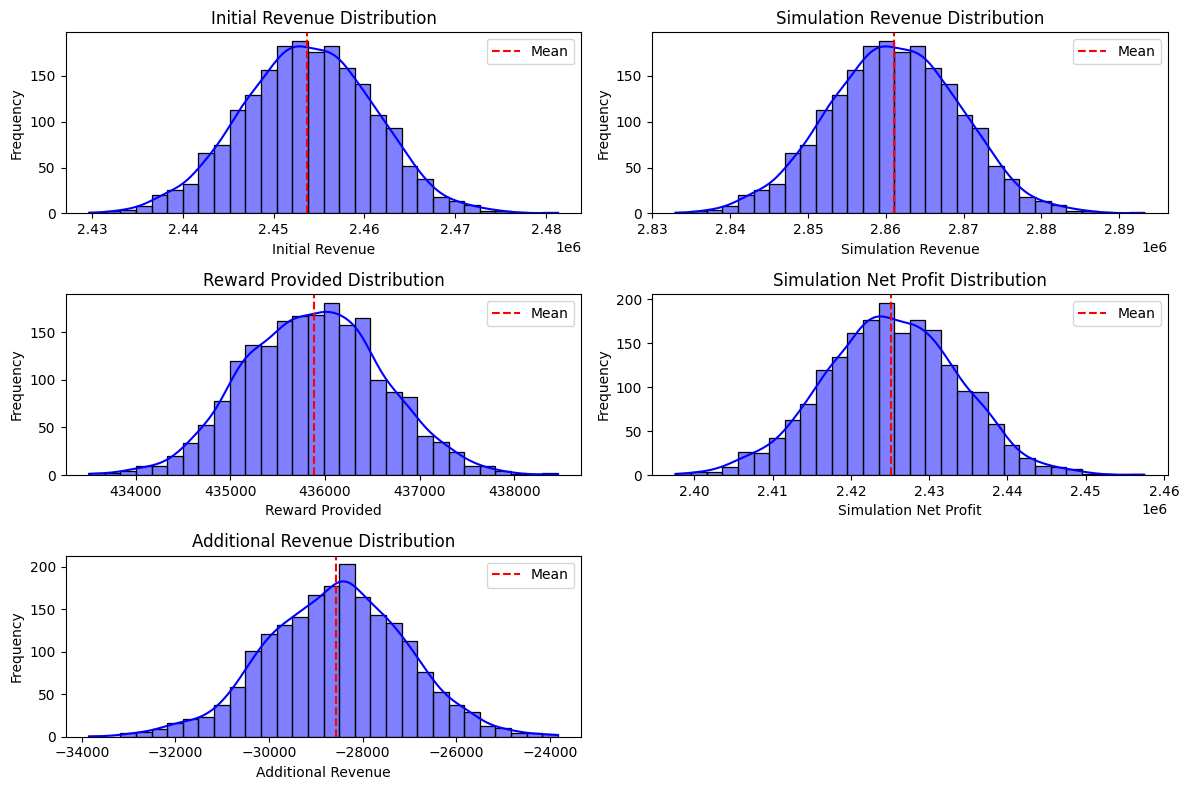

In [55]:
import numpy as np
import pandas as pd
from scipy.stats import norm, ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# 결과 저장용 딕셔너리
reward_analysis_results = {}

reward_combinations = list(distribution_df_top8['trust_level'].values)

for reward_combination in reward_combinations:
    print(f"\n==== Analysis for Reward Combination: {reward_combination} ====")
    group = simulation_df_with_all_reward[simulation_df_with_all_reward['Reward Combination']==reward_combination]
    # 1. 기댓값 (Expected Value)
    expected_values = group['Simulation Net Profit'].mean()
    print("Expected Values (Means):")
    print(expected_values)

    # 2. 분산 및 표준편차
    variances = group['Simulation Net Profit'].var()
    std_devs = group['Simulation Net Profit'].std()
    print("\nVariances:")
    print(variances)
    print("\nStandard Deviations:")
    print(std_devs)

    # 3. 신뢰 구간 (95% Confidence Interval)
    confidence = 0.95
    confidence_intervals = {}
    for col in ['Initial Revenue', 'Simulation Revenue', 'Reward Provided', 'Simulation Net Profit', 'Additional Revenue']:
        mean = group[col].mean()
        std_error = group[col].std() / np.sqrt(len(group))  # 표준 오차
        ci_lower, ci_upper = norm.interval(confidence, loc=mean, scale=std_error)
        confidence_intervals[col] = (ci_lower, ci_upper)
    print("\n95% Confidence Intervals:")
    for col, ci in confidence_intervals.items():
        print(f"{col}: {ci[0]:.2f} ~ {ci[1]:.2f}")

    # 4. t-test (정책 효과 비교)
    # 가정: Simulation Revenue와 Initial Revenue의 차이가 유의미한지 검정
    t_stat, p_value = ttest_ind(group['Simulation Revenue'], group['Initial Revenue'], equal_var=False)
    print(f"\nT-Test between Simulation Revenue and Initial Revenue: t-stat={t_stat:.2f}, p-value={p_value:.4f}")

    
    # 분포를 확인할 주요 컬럼 리스트
    columns_to_plot = [    'Initial Revenue',
    'Simulation Revenue',
    'Reward Provided',
    'Simulation Net Profit',
    'Additional Revenue']

    # 분포 그래프 그리기
    plt.figure(figsize=(12, 8))

    for i, col in enumerate(columns_to_plot, 1):
        plt.subplot(3, 2, i)  # 3행 2열 그래프 배치
        sns.histplot(group[col], kde=True, bins=30, color='blue')
        plt.title(f"{col} Distribution")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.axvline(group[col].mean(), color='red', linestyle='--', label='Mean')
        plt.legend()

    plt.tight_layout()
    plt.show()



==== Analysis for Reward Combination: {'High': 9, 'Mid': 4, 'Low': 3, 'Very Low': 0} ====

Correlation Matrix:
                       Initial Revenue  Simulation Revenue  Reward Provided  \
Initial Revenue               1.000000            1.000000        -0.067076   
Simulation Revenue            1.000000            1.000000        -0.067073   
Reward Provided              -0.067076           -0.067073         1.000000   
Simulation Net Profit         0.998408            0.998408        -0.123244   
Additional Revenue            0.932309            0.932308        -0.423384   

                       Simulation Net Profit  Additional Revenue  
Initial Revenue                     0.998408            0.932309  
Simulation Revenue                  0.998408            0.932308  
Reward Provided                    -0.123244           -0.423384  
Simulation Net Profit               1.000000            0.951223  
Additional Revenue                  0.951223            1.000000  


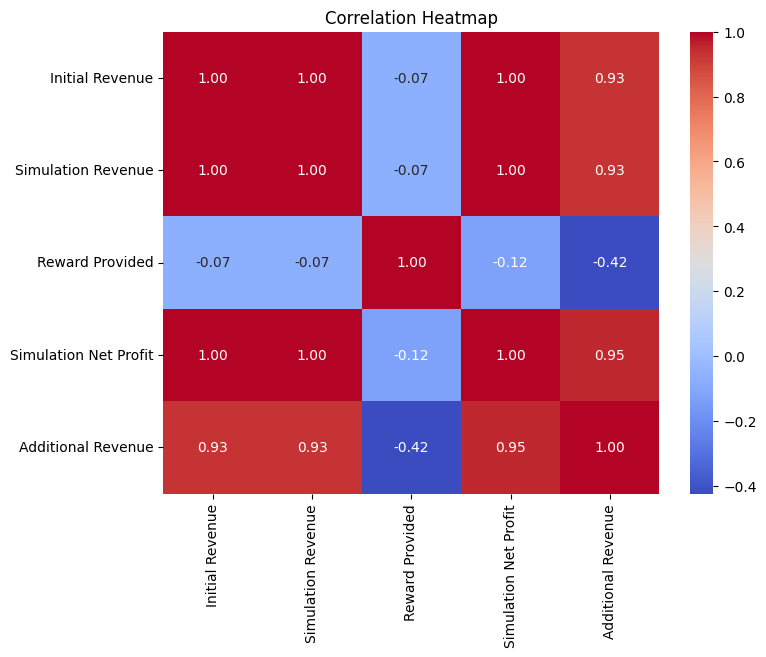


==== Analysis for Reward Combination: {'High': 8, 'Mid': 4, 'Low': 3, 'Very Low': 0} ====

Correlation Matrix:
                       Initial Revenue  Simulation Revenue  Reward Provided  \
Initial Revenue               1.000000            1.000000        -0.069566   
Simulation Revenue            1.000000            1.000000        -0.069563   
Reward Provided              -0.069566           -0.069563         1.000000   
Simulation Net Profit         0.998528            0.998528        -0.123573   
Additional Revenue            0.936932            0.936931        -0.413842   

                       Simulation Net Profit  Additional Revenue  
Initial Revenue                     0.998528            0.936932  
Simulation Revenue                  0.998528            0.936931  
Reward Provided                    -0.123573           -0.413842  
Simulation Net Profit               1.000000            0.954511  
Additional Revenue                  0.954511            1.000000  


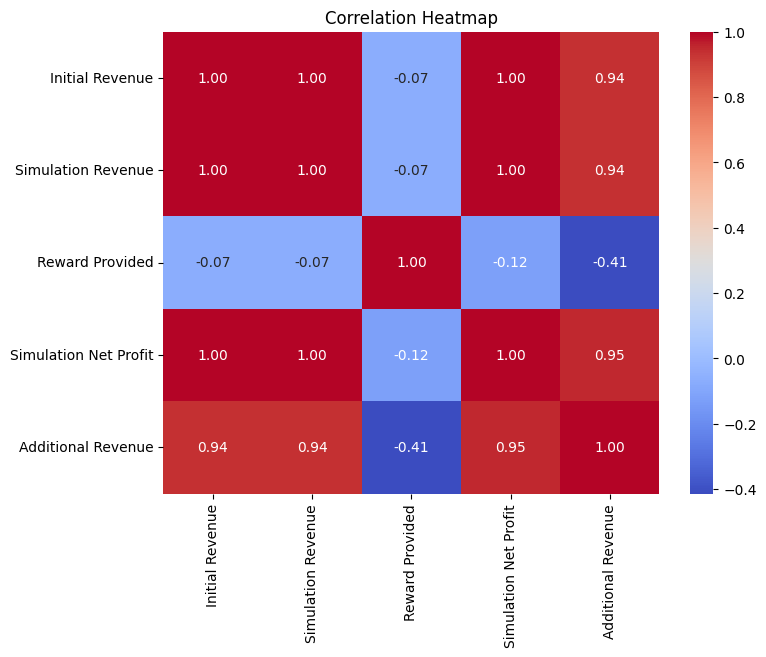


==== Analysis for Reward Combination: {'High': 7, 'Mid': 4, 'Low': 3, 'Very Low': 0} ====

Correlation Matrix:
                       Initial Revenue  Simulation Revenue  Reward Provided  \
Initial Revenue               1.000000            1.000000        -0.071755   
Simulation Revenue            1.000000            1.000000        -0.071752   
Reward Provided              -0.071755           -0.071752         1.000000   
Simulation Net Profit         0.998624            0.998623        -0.123969   
Additional Revenue            0.940679            0.940678        -0.405921   

                       Simulation Net Profit  Additional Revenue  
Initial Revenue                     0.998624            0.940679  
Simulation Revenue                  0.998623            0.940678  
Reward Provided                    -0.123969           -0.405921  
Simulation Net Profit               1.000000            0.957180  
Additional Revenue                  0.957180            1.000000  


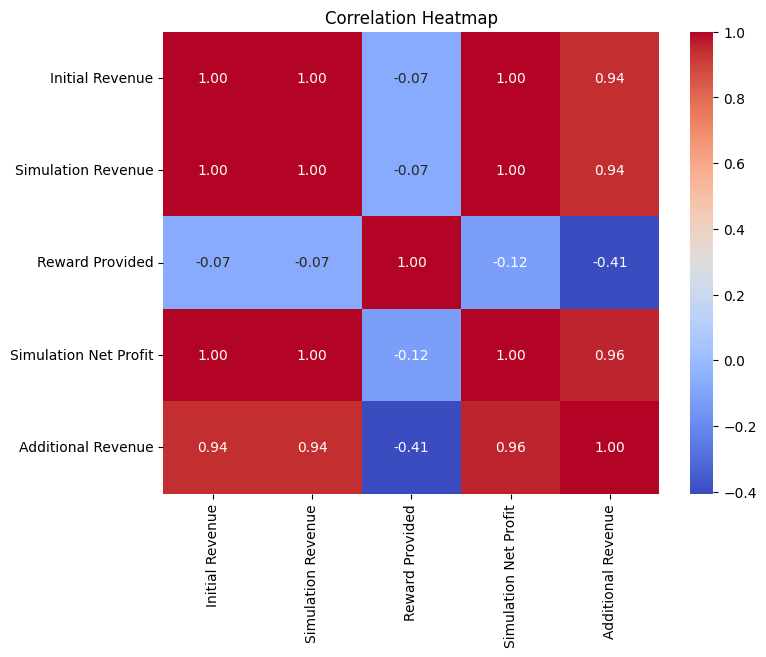


==== Analysis for Reward Combination: {'High': 6, 'Mid': 4, 'Low': 3, 'Very Low': 0} ====

Correlation Matrix:
                       Initial Revenue  Simulation Revenue  Reward Provided  \
Initial Revenue               1.000000            1.000000        -0.073508   
Simulation Revenue            1.000000            1.000000        -0.073505   
Reward Provided              -0.073508           -0.073505         1.000000   
Simulation Net Profit         0.998695            0.998695        -0.124337   
Additional Revenue            0.943516            0.943515        -0.399786   

                       Simulation Net Profit  Additional Revenue  
Initial Revenue                     0.998695            0.943516  
Simulation Revenue                  0.998695            0.943515  
Reward Provided                    -0.124337           -0.399786  
Simulation Net Profit               1.000000            0.959204  
Additional Revenue                  0.959204            1.000000  


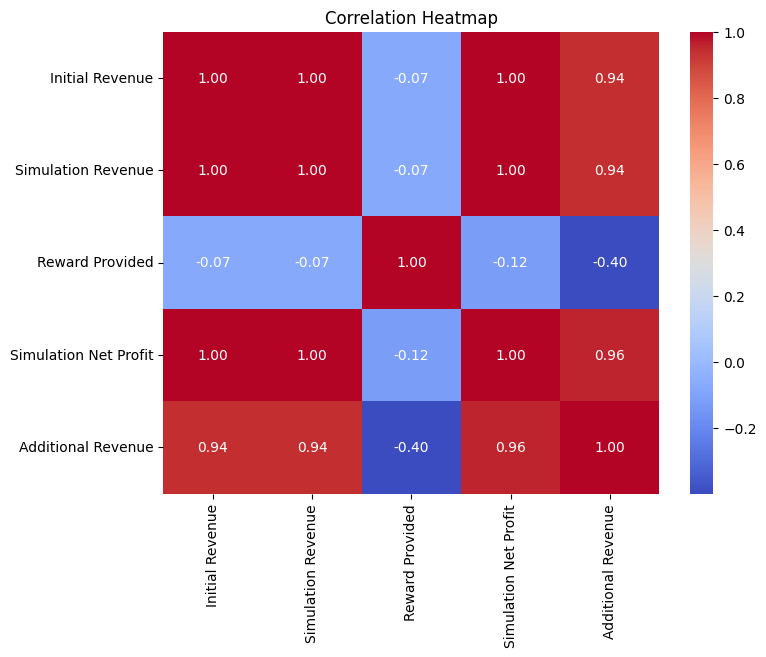


==== Analysis for Reward Combination: {'High': 7, 'Mid': 5, 'Low': 1, 'Very Low': 0} ====

Correlation Matrix:
                       Initial Revenue  Simulation Revenue  Reward Provided  \
Initial Revenue               1.000000            1.000000        -0.135300   
Simulation Revenue            1.000000            1.000000        -0.135299   
Reward Provided              -0.135300           -0.135299         1.000000   
Simulation Net Profit         0.996654            0.996654        -0.215832   
Additional Revenue            0.880039            0.880038        -0.589604   

                       Simulation Net Profit  Additional Revenue  
Initial Revenue                     0.996654            0.880039  
Simulation Revenue                  0.996654            0.880038  
Reward Provided                    -0.215832           -0.589604  
Simulation Net Profit               1.000000            0.915911  
Additional Revenue                  0.915911            1.000000  


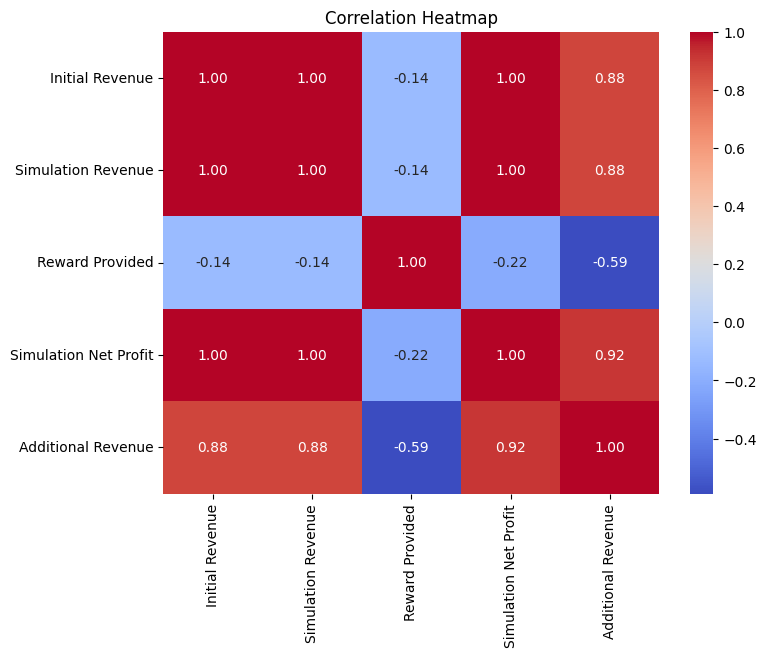


==== Analysis for Reward Combination: {'High': 8, 'Mid': 5, 'Low': 1, 'Very Low': 0} ====

Correlation Matrix:
                       Initial Revenue  Simulation Revenue  Reward Provided  \
Initial Revenue               1.000000            1.000000        -0.133779   
Simulation Revenue            1.000000            1.000000        -0.133778   
Reward Provided              -0.133779           -0.133778         1.000000   
Simulation Net Profit         0.996571            0.996571        -0.215323   
Additional Revenue            0.877575            0.877575        -0.592530   

                       Simulation Net Profit  Additional Revenue  
Initial Revenue                     0.996571            0.877575  
Simulation Revenue                  0.996571            0.877575  
Reward Provided                    -0.215323           -0.592530  
Simulation Net Profit               1.000000            0.914238  
Additional Revenue                  0.914238            1.000000  


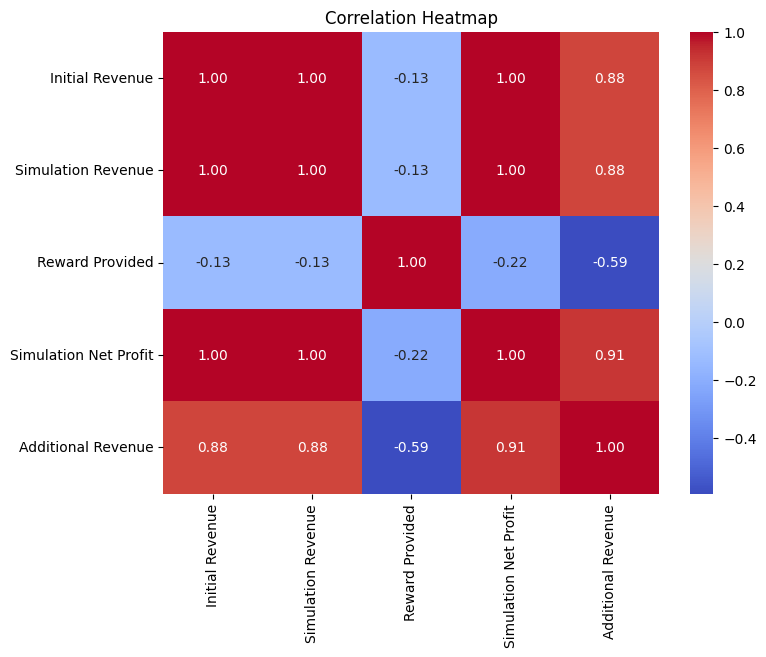


==== Analysis for Reward Combination: {'High': 9, 'Mid': 5, 'Low': 1, 'Very Low': 0} ====

Correlation Matrix:
                       Initial Revenue  Simulation Revenue  Reward Provided  \
Initial Revenue               1.000000            1.000000        -0.131879   
Simulation Revenue            1.000000            1.000000        -0.131878   
Reward Provided              -0.131879           -0.131878         1.000000   
Simulation Net Profit         0.996464            0.996464        -0.214701   
Additional Revenue            0.874445            0.874445        -0.596208   

                       Simulation Net Profit  Additional Revenue  
Initial Revenue                     0.996464            0.874445  
Simulation Revenue                  0.996464            0.874445  
Reward Provided                    -0.214701           -0.596208  
Simulation Net Profit               1.000000            0.912115  
Additional Revenue                  0.912115            1.000000  


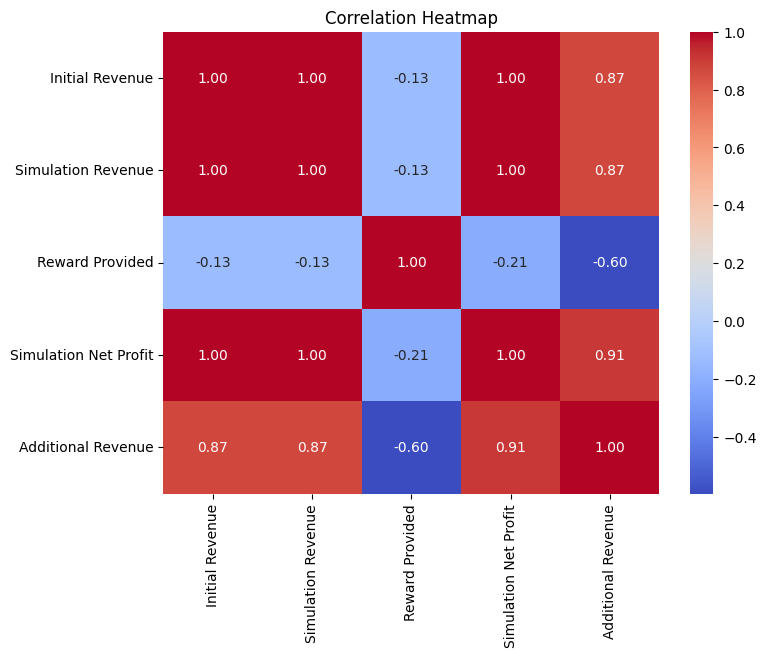

In [56]:

for reward_combination in reward_combinations:
    print(f"\n==== Analysis for Reward Combination: {reward_combination} ====")
    group = simulation_df_with_all_reward[simulation_df_with_all_reward['Reward Combination']==reward_combination]
    # 5. 상관관계 분석
    correlation_matrix = group[['Initial Revenue', 'Simulation Revenue', 'Reward Provided', 'Simulation Net Profit', 'Additional Revenue']].corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)

    # 시각화 (상관 분석 히트맵)


    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()